In [2]:
import numpy as np, requests, zipfile, StringIO, pandas as pd, json, copy

#suppres warnings
import warnings
warnings.simplefilter(action = "ignore")

In [3]:
import matplotlib.pyplot as plt

In [7]:
z = zipfile.ZipFile('Forestry_Trade_Flows_E_All_Data.zip')   #stream web content of zip file to read
df=pd.read_csv(z.open('Forestry_Trade_Flows_E_All_Data.csv'))

In [23]:
set(df[df['Reporter Countries']=='Romania']['Element'])

{'Export Quantity', 'Export Value', 'Import Quantity', 'Import Value'}

In [111]:
data={}
cs=set()
for i in df.T.iteritems():
    country=i[1][0]
    partner=i[1][2]
    cs.add(country)
    cs.add(partner)
    item=i[1][5]
    element=i[1][7]
    for k in range(9,44,2):
        if country not in data: data[country]=[]
        if not np.isnan(i[1][k]):
            if 'Value' in element: 
                year=int(df.columns[k][1:])
                if 'Import' in element: g="f"
                else: g="m"
                data[country].append({"partner":partner,
                                  "item":item,
                                  "g":g,
                                  "year":year,
                                  "s":i[1][k]})     

In [151]:
data={}
cs=set()
for i in df.T.iteritems():
    country=i[1][0]
    partner=i[1][2]
    cs.add(country)
    cs.add(partner)
    item=i[1][5]
    element=i[1][7]
    for k in range(9,44,2):
        if country not in data: data[country]={}
        if not np.isnan(i[1][k]):
            year=int(df.columns[k][1:])
            if 'Import' in element: g="f"
            else: g="m"
            if g not in data[country]:data[country][g]={}
            if partner not in data[country][g]:data[country][g][partner]={}
            if year not in data[country][g][partner]:data[country][g][partner][year]={}
            if item not in data[country][g][partner][year]:data[country][g][partner][year][item]={}
            if 'Value' in element: 
                data[country][g][partner][year][item]["s"]=i[1][k]
            else: 
                data[country][g][partner][year][item]["p"]=i[1][k]

In [154]:
data2={}
for country in data:
    if country not in data2:data2[country]=[]
    for g in data[country]:
        for partner in data[country][g]:
            for year in data[country][g][partner]:
                for item in data[country][g][partner][year]:
                    if (("s" in data[country][g][partner][year][item]) and ("p" in data[country][g][partner][year][item])):
                        data2[country].append({"partner":partner,
                                  "item":item,
                                  "g":g,
                                  "year":year,
                                  "s":data[country][g][partner][year][item]["s"],
                                  "p":data[country][g][partner][year][item]["p"]
                             })    

In [155]:
for c in data2:
    file('dummy.json','w').write(json.dumps(data2[c])) 
    zf = zipfile.ZipFile('zips/'+str(c)+'.zip', mode='w')
    zf.write('dummy.json','data.json',compress_type=compression)
    zf.close()

In [112]:
file('countries.json','w').write(json.dumps(data.keys())) 

In [113]:
file('data.json','w').write(json.dumps(data)) 

In [ ]:
try:
    import zlib
    compression = zipfile.ZIP_DEFLATED
except:
    compression = zipfile.ZIP_STORED

In [116]:
cdict={}
for i in df.T.iteritems():
    if i[1][0] not in cdict:cdict[i[1][0]]=i[1][1]
    if i[1][2] not in cdict:cdict[i[1][2]]=i[1][3]
    if i[1][1] not in cdict:cdict[i[1][1]]=i[1][0]
    if i[1][3] not in cdict:cdict[i[1][3]]=i[1][2]

In [119]:
cdict[107]=u"C\xf4te d'Ivoire"
cdict[u"C\xf4te d'Ivoire"]=cdict["C\xf4te d'Ivoire"]
cdict.pop("C\xf4te d'Ivoire")

In [125]:
cdict[182]=u'R\xe9union'
cdict[u'R\xe9union']=cdict['R\xe9union']
cdict.pop('R\xe9union')

182L

In [127]:
file('cdict.json','w').write(json.dumps(cdict)) 

In [131]:
countries=[]
for k in cdict:
    try: int(k)
    except: countries.append(k)
file('countries.json','w').write(json.dumps(countries)) 

In [134]:
cdict[252]

'Unspecified'

<h3>1.2. Fertilizers</h3>  

We repeat the operations for the *Fertilizers* and *Fertilizers Archive*, *Population*, *Food Balance Sheets* and *Import* modules.   
(To conserve display space, we only dispaly the first 5 elements - i.e. *head* - of the dataframes.)
<br>For the <code>fertilizer</code> dataframes (<code>fertilizers1</code>, <code>fertilizers2</code>), the units are implicit (*tonnes*) and hence are not loaded to conserve memory.

In [7]:
elements=['Consumption in nutrients']
items=['Potash Fertilizers (K20 total nutrients)', 'Phosphate Fertilizers (P205 total nutrients)',\
       'Nitrogen Fertilizers (N total nutrients)']
fertilizers1 = new_get_data([masterpath,indicators[1],indicators[1]],\
                        ['Country','Item','Element'],[0,2,1],elements,items,[],[2002,2013])
#note that for fertilizers1, the categories that are of interest to us are stored in the Item column
#extra processing for new FAO data tables
fertilizers1.columns=range(2002,2013)
fertilizers1=pd.DataFrame(fertilizers1.stack())
fertilizers1.index = fertilizers1.index.swaplevel(1, 3).swaplevel(2, 3)
fertilizers1.index.names=([u'Country', 'Year', u'Element', u'Item'])
fertilizers1.columns=['Value']
fertilizers1.xs(['Brazil',2002], level=[0,1]).head() #remove .head() to view all items
#data availability is 2002-2012

Value
Element                  Item                                                 
Consumption in nutrients Nitrogen Fertilizers (N total nutrients)      1834733
                         Phosphate Fertilizers (P205 total nutrients)  2634552
                         Potash Fertilizers (K20 total nutrients)      2962910

In [8]:
elements=['Consumption']
items=['Phosphate fertilizers', 'Potash fertilizers', 'Nitrogenous fertilizers']
fertilizers2 = get_data([masterpath,indicators[2],indicators[2]],\
                        ['Country','Item','Element','Year','Value'],[0,3,2,1],elements,items)
#note that for fertilizers2, the categories that are of interest to us are stored in the Item column
fertilizers2.xs(['Brazil',1961], level=[0,1]).head() #remove .head() to view all items
#data availability is 1961-2002

Value
Element     Item                           
Consumption Nitrogenous fertilizers   55064
            Phosphate fertilizers    144213
            Potash fertilizers        70727

<h3>1.3. Labor</h3>
<p>In order to estimate labor energy, we create the <code>population</code> dataframe from the <i>Population</i> module of <i>FAOSTAT</i>.</p>

In [9]:
elements=['Total economically active population in Agr','Total Population - Both sexes']
items=['Population - Est. & Proj.']
population = new_get_data([masterpath,indicators[3],indicators[3]],\
                      ['Country','Item','Element'],[0,2,1],elements,items,[],[1961,2051])
#note that for population, the categories that are of interest to us are stored in the Item column
#extra processing for new FAO data tables
population.columns=range(1961,2051)
population=pd.DataFrame(population.stack())
population.index = population.index.swaplevel(1, 3).swaplevel(2, 3)
population.index.names=([u'Country', 'Year', u'Element', u'Item'])
population.columns=['Value']
population.xs(['Brazil',1980], level=[0,1]).head()
#data availability is 1961-2050 for some countries, but mostly only 1980-2020

,,Value
Element,Item,
Total Population - Both sexes,Population - Est. & Proj.,121740
Total economically active population in Agr,Population - Est. & Proj.,16345


<h3>1.4. Food</h3>  

Food balance sheets are the last items to load. Note that for the <code>balance</code> dataframe, the categories of interest are stored in the *Element* column. We also need to import the *ItemCode* column for categorization purposes. Hence the indexing order changes to 0,3,2. Just like in for the case of <code>fertilizers</code>, the units are implicit (*1000 tonnes*) and hence are not loaded to conserve memory. Due to the size of the <code>balance</code> dataframe, execution of the following cell can take several minutes to complete.

In [10]:
elements=['Food supply (kcal/capita/day)','Food supply quantity (kg/capita/yr)']\
        +['Feed','Food','Processing','Other uses','Seed','Waste',\
          'Import Quantity','Export Quantity','Stock Variation']\
        +['Production']

itemfilter='(((2511<=ItemCode)&(ItemCode<=2782))\
                              |(ItemCode==2805)\
                              |(ItemCode==2899)\
                              |(ItemCode==2912)\
                              |(ItemCode==2948)\
                              |(ItemCode==2901)\
                              |(ItemCode==2960)\
                              |(ItemCode==2961))'
        
balance = new_get_data([masterpath,indicators[4],indicators[4]],\
                      ['Country','Item','Element','Item Code'],[0,3,2],elements,[],[],[1961,2012])
#need to save ItemCodes for categorization
#note that for balance, the categories that are of interest to us are stored in the Element column
#extra processing for new FAO data tables
balance.columns=['ItemCode']+range(1961,2012)
balance=balance.query(itemfilter).set_index("ItemCode", append=True)
balance=pd.DataFrame(balance.stack()).reset_index(level='ItemCode')
balance.columns=['ItemCode','Value']
balance.index = balance.index.swaplevel(1, 3)
balance.index.names=([u'Country', 'Year', u'Item', u'Element'])
balance.xs(['Brazil',1961,'Maize and products'], level=[0,1,2])#.head()
#data availability is 1961-2011

,ItemCode,Value
Element,,
Production,2514,9036.00
Import Quantity,2514,6.00
Stock Variation,2514,0.00
Export Quantity,2514,4.00
Feed,2514,5961.00
Seed,2514,184.00
Waste,2514,904.00
Processing,2514,4.00
Food,2514,1985.00


<h3>1.5. Imports</h3>  

The value added imports of all agricultural products are the last items to load. Note that for the <code>imports</code> dataframe, the categories of interest are stored in the *Element* column. Just like the <code>balance</code> dataframe, execution of the following cell can take several minutes to complete.

In [8]:
elements=['Import Value']
items=['Agricult.Products,Total']
imports = new_get_data([masterpath,indicators[7],indicators[7]],\
                      ['Country','Item','Element'],[0,2,1],elements,items,[],[1961,2012])
#note that for imports, the categories that are of interest to us are stored in the Element column
#extra processing for new FAO data tables
imports.columns=range(1961,2012)
imports=pd.DataFrame(imports.stack())
imports.index = imports.index.swaplevel(1, 3).swaplevel(2, 3)
imports.index.names=([u'Country', 'Year', u'Element', u'Item'])
imports.columns=['Value']
imports.xs(['Brazil',1980], level=[0,1]).head()
#data availability is 1961-2011

,,Value
Element,Item,
Import Value,"Agricult.Products,Total",2470870


In [9]:
imports.loc['United Arab Emirates']

,,,Value
Year,Element,Item,
1961,Import Value,"Agricult.Products,Total",3752
1962,Import Value,"Agricult.Products,Total",4065
1963,Import Value,"Agricult.Products,Total",4245
1964,Import Value,"Agricult.Products,Total",4459
1965,Import Value,"Agricult.Products,Total",4815
1966,Import Value,"Agricult.Products,Total",11588
1967,Import Value,"Agricult.Products,Total",13642
1968,Import Value,"Agricult.Products,Total",22958
1969,Import Value,"Agricult.Products,Total",22221


<h2>2. Processing</h2>
<p>In the following section we convert the dataframes defined above into <i>JSON</i> format that can be read by the <i>D3.js</i> javascript framework for web visualization. Aside form the data manipulation, we also compute and add additional information such as caloric values and food category sums into the <i>JSON</i> files. The <i>Sankey</i> plugin of <i>D3.js</i> requires the input <i>JSON</i>s to be in a very specific format. All of them have to inclue at least the following key-value pairs:</p>
<ul>
    <li><code>nodes</code>
        <ul>
            <li><code>name</code>: name of the node (the order or these entries (<code>groupdict</code>) automatically assigns an index (<code>count</code>) to the names)</li>
        </ul>
    </li>
    <li><code>links</code>
        <ul>
            <li><code>source</code>: the index of the source node</li>
            <li><code>target</code>: the index of the target node</li>
            <li><code>value</code>: value of the link</li>
        </ul>
    </li>
</ul>

Later this has been extended to add support for the indvidual coloring of nodes, positioning in the horizontal plane, as well as value fixation.

<ul>
    <li><code>nodes</code>
        <ul>
            <li><code>color</code>: color of the node</li>
            <li><code>layer</code>: sets a fixed node x-index from the left</li>
            <li><code>value</code>: sets a fixed node height</li>
        </ul>
</ul>

From this point forward, we will interchangibly refer to links as <i>flows</i>, due to the energetic aspect of the links. We will include additional information such as breakdown (stored under the <i>key</i> <code>supply</code>) or secondary flow values for a different type of category (stored under the <i>key</i> <code>prod</code>). As a first step, we define the function <code>add_to_json(i,k,source,target,value,prod,supply)</code> which will take numeric entries and create the <i>JSON</i>-like structure presented above. The conversion is made easy using <i>Python dictionaries</i>. The argument <code>i</code> defines the detail level at which we are passing the data and it is one of the following:
<ol>
    <li>Food hypergroups</li>
    <li>Food supergroups</li>
    <li><i>FAO</i> food groups</li>
    <li><i>FAO</i> crop groups</li>
</ol>
The argument <code>k</code> corresponds to the <i>Python</i> dictionary in the global variable <code>data[i][k]</code> to which the data will be written to. We will generate the following datasets:
<ul>
    <li>Gross energy [TWh] - <code>data[i][0]</code> variable - includes food-system and crop residues</li>
    <li>Food system energy [TWh] - <code>data[i][1]</code> variable - includes agri-system and food trade and scondary food products</li>
    <li>Agri-system energy [TWh] - <code>data[i][2]</code> variable - includes primary crops</li>
    <li> Food weight [ktonnes] - <code>data[i][3]</code> variable</li>
</ul>

In [12]:
def add_to_json(i,k,source,target,value,prod,supply,targetvalue=""):
    
    global groupdict
    global count
    global data
    
    if (~np.isnan(value)&(value!=0)): #only add non-zero and non-NaN values
        
        #update group dictionary if source not yet encountered
        if source not in groupdict[i][k].keys():
            groupdict[i][k][source]=count[i][k]
            nodes_innerdict={} 
            nodes_innerdict["name"]=source
            if (layer(k,source)!=-1): nodes_innerdict["layer"]=layer(k,source)
            if (color(k,source)!=""): nodes_innerdict["fill"]=color(k,source)
            data[i][k]["nodes"].append(nodes_innerdict)
            count[i][k] += 1 
            
        #update group dictionary if target not yet encountered
        if target not in groupdict[i][k].keys(): 
            groupdict[i][k][target]=count[i][k]
            nodes_innerdict={} 
            nodes_innerdict["name"]=target
            if (layer(k,target)!=-1): nodes_innerdict["layer"]=layer(k,target)
            if (color(k,target)!=""): nodes_innerdict["fill"]=color(k,target)
            if (targetvalue!=""): nodes_innerdict["value"]=targetvalue
            data[i][k]["nodes"].append(nodes_innerdict)
            count[i][k] += 1 
            
        links_innerdict={} 
        links_innerdict["source"]=groupdict[i][k][source]
        links_innerdict["target"]=groupdict[i][k][target]
        links_innerdict["value"]=value
        links_innerdict["prod"]=prod
        links_innerdict["supply"]=supply
        data[i][k]["links"].append(links_innerdict)
    else:
        pass #print 'NaN',source,target

We define the main nodes, based on the flows of the *Food Balance Sheets*. An extension of these nodes is used when loading the data in *Section 1*.

In [13]:
elements1=['Feed','Food','Processing','Other uses','Seed','Waste',\
           'Import Quantity','Export Quantity','Stock Variation','Production']        
elements2=['Food supply (kcal/capita/day)','Food supply quantity (kg/capita/yr)']
fuels1=['Electricity', 'Energy for power irrigation']
fuels2=['Motor Gasoline','Gas-Diesel oil', 'Natural gas (including LNG)',\
        'Fuel oil', 'Liquefied petroleum gas (LPG)','Coal']
fuels3=['Gas-diesel oils used in fisheries','Fuel oil used in fisheries']
fert1=['Phosphate fertilizers', 'Potash fertilizers', 'Nitrogenous fertilizers']
fert2=['Potash Fertilizers (K20 total nutrients)', 'Phosphate Fertilizers (P205 total nutrients)',\
       'Nitrogen Fertilizers (N total nutrients)']

The code functions is structured into 5 *parts* over 2 *modules*: 
    
- *OUTPUT* module
    - Food part
      - Define food groups
      - Calculate food flows
- *INPUT* module
    - Fuels part
      - Electricity
      - Fossil fuels
    - Fertilizers part
    - Labor part
    - Imports part

This is followed by the main code section which calls the above parts and saves the data in the desired format.

- Save data
- Main  

Then main code is executed within two <code>for</code> cycles that loop over all countries and years.  All code parts take as arguments <code>country</code> and <code>year</code>. In the following we present the code parts one by one. Throughout code development it has been assumed that the order in which the *IPython cells* corresponding to the code parts defined below are run is preserved. Therefore we define the <code>main</code> procedure in *Section 3*, after everything else has been defined, including the <code>save data</code> procedure in *Section 2.6*.  

<h3>2.1 Food part</h3>  

<h3>2.1.1. Define food groups</h3>  

First we need to define the food groups, for all abstraction levels. In adition to the standard *FAOSTAT* categories, we use our own group definitions. These groups are referred to as *supergroups* throughout the code and are stored in the <code>supergroup</code> array since the *FAOSTAT* entries in the *Food Balance Sheets* dataset are already aggregated, such as *Apples & Products or Wheat & Products*. We will refer to individual entries of the <code>balance</code> dataframe as *food items* or *food item groups* bearing in mind that these do not represent individual crop types, but an already aggregated category, as per the <a href="http://www.fao.org/economic/ess/ess-fs/fs-methods/ess-fbs02/en/" target="_blank"><i>FAOSTAT</i> handbook</a>. However, it is possible to retrive the production data for individual crops such as *Apples* or *Wheat Bran* from the *Production Crops* database by calling <code>get_data(10)</code>, but this is outside the scope of this work and we will exclusively use the <code>balance</code> dataframe.  

To create our own classification with a comfortable detail level, as well as to doublecheck the *FAOSTAT* groupings, we use the *FAOSTAT* item codes, as per their handbook. Likewise, within a <code>for</code> loop we define the corresponding *supergroups* for all items for all abstraction levels and where applicable, also their *parent* groups: secondary food items have their origin in another food item, called a *parent*, such as *Feed* for *Animal Products* or *Processing* for *Oils*. This information will be stored in the <code>supergroup</code> and <code>parent</code> array variables, accesible globally.

In [14]:
def food_groups(country, year):
    
    ###############################################################################################
    ######                            FOOD PART - define food groups                         ######
    ###############################################################################################
    
    # associate food items to their respective groups

    global supergroup         #supergroup to which the food item group belongs to, 
                              #i.e. Fruits is the supergroup for Apples & Products
    global parent             #certain food items have their origin in another food item, called a parent
                              #i.e. Feed is the parent for Animal Products and Processing is the parent for Oils
    global gross              #this is necessary for recording crop residues on the gross energy details level
                              #precentage of crop that is unused but has energy residues remaining inside it, husk
                              #http://www.sciencedirect.com/science/article/pii/S0160412004001564
                              #crop residue average energy content for burning 300kcal/100g
                              #another possibility is to estimate from emissions and back-calculate
                              #energy content from carbon
                              #http://www.gutenberg.org/files/22657/22657-h/chapters/value.html#equn_18

    for element in elements1+elements2:
        for i in balance.xs([country,year,element], level=[0,1,3]).T.iteritems():
            fooditem = i[0]       #choose column in which food item names are stored, might need to change it
            if "+" in fooditem:   #simplify food names for the sake of visualization
                fooditem=fooditem[0:fooditem.find("+")-1]
            if "(" in fooditem:
                fooditem=fooditem[0:fooditem.find("(")-1]
            if "and products" in fooditem:
                fooditem=fooditem[0:fooditem.find("and products")-1]

            # if fooditem has not been encountered yet, assing its properties
            if fooditem not in supergroup[3].keys():
                index = i[1][0]       #choose column in which food group codes are stored, might need to change it
                parent[fooditem]='None'
                supergroup[3][fooditem]=fooditem     #default supergroup is self
                supergroup[0][fooditem]='Fruits, Roots & Vegetables' 
                for i in range (1,3):   #assign default supergroup to all aggregate food items
                    supergroup[i][fooditem]='Others'
                if ((2511<=index<=2659) | (index==2745) | (index==2805) | (index==2899) | (index==2912)):
                    if ((2511<=index<=2520) | (index==2805)):
                        supergroup[2][fooditem] = 'Cereals - Excluding Beer'
                        supergroup[1][fooditem] = 'Cereals'
                        supergroup[0][fooditem] = 'Cereals'
                        parent[fooditem]        = 'None'
                        gross[fooditem] =gross[supergroup[0][fooditem]]\
                                        =gross[supergroup[1][fooditem]]\
                                        =gross[supergroup[2][fooditem]] = 1.0
                    elif (2531<=index<=2535):
                        supergroup[2][fooditem] = 'Starchy Roots'
                        supergroup[1][fooditem] = 'Starchy Roots'
                        supergroup[0][fooditem] = 'Fruits, Roots & Vegetables'
                        parent[fooditem]        = 'None'
                        gross[fooditem] =gross[supergroup[0][fooditem]]\
                                        =gross[supergroup[1][fooditem]]\
                                        =gross[supergroup[2][fooditem]] = 0.25
                    elif (2536<=index<=2537):
                        supergroup[2][fooditem] = 'Sugar Crops'
                        supergroup[1][fooditem] = 'Sugar Crops'
                        supergroup[0][fooditem] = 'Sugar Crops'
                        parent[fooditem]        = 'None'
                        gross[fooditem] =gross[supergroup[0][fooditem]]\
                                        =gross[supergroup[1][fooditem]]\
                                        =gross[supergroup[2][fooditem]] = 0.2
                    elif ((2541<=index<=2543)|(index==2745)):
                        supergroup[2][fooditem] = 'Sugar & Sweeteners'
                        supergroup[1][fooditem] = 'Sugar'
                        supergroup[0][fooditem] = 'Sugar'
                        parent[fooditem]        = 'Processing'
                    elif (2546<=index<=2549):
                        supergroup[2][fooditem] = 'Pulses'
                        supergroup[1][fooditem] = 'Fruits & Vegetables'
                        supergroup[0][fooditem] = 'Fruits, Roots & Vegetables'
                        parent[fooditem]        = 'None'
                        gross[fooditem] =gross[supergroup[0][fooditem]]\
                                        =gross[supergroup[1][fooditem]]\
                                        =gross[supergroup[2][fooditem]] = 0.5#1.0
                    elif (2555<=index<=2570):
                        supergroup[2][fooditem] = 'Oilcrops'
                        supergroup[1][fooditem] = 'Oilcrops'
                        supergroup[0][fooditem] = 'Oilcrops'
                        parent[fooditem]        = 'None'
                        gross[fooditem] =gross[supergroup[0][fooditem]]\
                                        =gross[supergroup[1][fooditem]]\
                                        =gross[supergroup[2][fooditem]] = 0.5#1.0
                    elif (2571<=index<=2586):
                        supergroup[2][fooditem] = 'Vegetable Oils'
                        supergroup[1][fooditem] = 'Vegetable Oils'
                        supergroup[0][fooditem] = 'Vegetable Oils'
                        parent[fooditem]        = 'Processing'
                    elif (2601<=index<=2605):
                        supergroup[2][fooditem] = 'Vegetables'
                        supergroup[1][fooditem] = 'Fruits & Vegetables'
                        supergroup[0][fooditem] = 'Fruits, Roots & Vegetables'
                        parent[fooditem]        = 'None'
                        gross[fooditem] =gross[supergroup[0][fooditem]]\
                                        =gross[supergroup[1][fooditem]]\
                                        =gross[supergroup[2][fooditem]] = 0.5#1.0
                    elif (2611<=index<=2625):
                        supergroup[2][fooditem] = 'Fruits - Excluding Wine'
                        supergroup[1][fooditem] = 'Fruits & Vegetables'
                        supergroup[0][fooditem] = 'Fruits, Roots & Vegetables'
                        parent[fooditem]        = 'None'
                    elif (2630<=index<=2635):
                        supergroup[2][fooditem] = 'Stimulants'
                        supergroup[1][fooditem] = 'Others'
                        supergroup[0][fooditem] = 'Fruits, Roots & Vegetables'
                        parent[fooditem]        = 'None'
                    elif (2640<=index<=2645):
                        supergroup[2][fooditem] = 'Spices'
                        supergroup[1][fooditem] = 'Others'
                        supergroup[0][fooditem] = 'Fruits, Roots & Vegetables'
                        parent[fooditem]        = 'None'
                    elif (2655<=index<=2659):
                        supergroup[2][fooditem] = 'Alcoholic Beverages'
                        supergroup[1][fooditem] = 'Other Processed'
                        supergroup[0][fooditem] = 'Other Processed'
                        parent[fooditem]        = 'Processing'
                    elif (index==2899):
                        supergroup[2][fooditem] = 'Miscellaneous'
                        supergroup[1][fooditem] = 'Others'
                        supergroup[0][fooditem] = 'Fruits, Roots & Vegetables'
                        parent[fooditem]        = 'None'
                    elif (index==2912):
                        supergroup[2][fooditem] = 'Treenuts'
                        supergroup[1][fooditem] = 'Fruits & Vegetables'
                        supergroup[0][fooditem] = 'Fruits, Roots & Vegetables'
                        parent[fooditem]        = 'None'

                elif ((2731<=index<=2782) | (index==2945)| (index==2948) | (index==2949) | (index==2961)):
                    if (2731<=index<=2736):
                        supergroup[2][fooditem] = 'Meat'
                        supergroup[1][fooditem] = 'Animal Products'
                        supergroup[0][fooditem] = 'Animal Products'
                        parent[fooditem]        = 'Feed'
                    elif (2737<=index<=2743):
                        supergroup[2][fooditem] = 'Animal Fats'  
                        supergroup[1][fooditem] = 'Other Processed' 
                        supergroup[0][fooditem] = 'Other Processed' 
                        parent[fooditem]        = 'Processing'
                    elif (index==2744):
                        supergroup[2][fooditem] = 'Eggs'
                        supergroup[1][fooditem] = 'Animal Products'
                        supergroup[0][fooditem] = 'Animal Products'
                        parent[fooditem]        = 'Feed'
                    elif (2761<=index<=2768):
                        supergroup[2][fooditem] = 'Fish, Seafood'
                        supergroup[1][fooditem] = 'Aquatic Products'
                        supergroup[0][fooditem] = 'Aquatic Products'
                        parent[fooditem]        = 'Feed'
                    elif ((2769<=index<=2775)|(index==2961)):
                        supergroup[2][fooditem] = 'Aquatic Products, Other'
                        supergroup[1][fooditem] = 'Aquatic Products'
                        supergroup[0][fooditem] = 'Aquatic Products'
                        parent[fooditem]        = 'Feed'
                    elif (2781<=index<=2782):
                        supergroup[2][fooditem] = 'Animal Fats'
                        supergroup[1][fooditem] = 'Other Processed'
                        supergroup[0][fooditem] = 'Other Processed'
                        parent[fooditem]        = 'Processing'
                    elif (index==2948):
                        supergroup[2][fooditem] = 'Milk - Excluding Butter'
                        supergroup[1][fooditem] = 'Animal Products'
                        supergroup[0][fooditem] = 'Animal Products'
                        parent[fooditem]        = 'Feed'

                #section for variables which only have a secondary flow (from Feed or Processing)
                #currently only Palm Oil because it only belongs to Processing, no other categories
                #need to create (practically non-food) super crop flow
                supergroup[0]["Oil Palm"]=supergroup[1]["Oil Palm"]=supergroup[2]["Oil Palm"]='Oilcrops'
                supergroup[3]["Oil Palm"]='Oil Palm'
                parent["Oil Palm"]='None'

                #create supergroups of supergroups
                supergroup[2][supergroup[2][fooditem]] = supergroup[2][fooditem]
                supergroup[2][supergroup[1][fooditem]] = supergroup[2][fooditem]
                supergroup[2][supergroup[0][fooditem]] = supergroup[2][fooditem]
                supergroup[1][supergroup[2][fooditem]] = supergroup[1][fooditem]
                supergroup[1][supergroup[1][fooditem]] = supergroup[1][fooditem]
                supergroup[1][supergroup[0][fooditem]] = supergroup[1][fooditem]
                supergroup[0][supergroup[2][fooditem]] = supergroup[0][fooditem]
                supergroup[0][supergroup[1][fooditem]] = supergroup[0][fooditem]
                supergroup[0][supergroup[0][fooditem]] = supergroup[0][fooditem]
                
                #create parents of supergroups
                parent[supergroup[0][fooditem]]=parent[supergroup[1][fooditem]]=\
                parent[supergroup[2][fooditem]]=parent[fooditem]

Before every section, we conduct a data profiling - this meas we interpolate the missing values of the dataframe using data from the neighboring countries or global values. This is the <code>food_profiling</code>, which eliminates *0* and *NaN* values from the dataframes. Food values are an exception compared to the rest of energy data as they are not interpolated.

In [15]:
def food_profiling(country):
    y={}
    
    for i in balance.loc[country].T.iteritems(): #make just one call, filter to country, superfast
        foodvalue=i[1][0] #choose column in which food item values are stored
        if (~np.isnan(foodvalue)&(foodvalue!=0)):
            year     = int(i[0][0]) #choose column in which years are stored
            element  = i[0][2]      #choose column in which element names are stored
            fooditem = i[0][1]      #choose column in which food item names are stored, might need to change it
            if "+" in fooditem:     #simplify food names for the sake of visualization, remove +,(),'and products'
                fooditem=fooditem[0:fooditem.find("+")-1]
            if "(" in fooditem:
                fooditem=fooditem[0:fooditem.find("(")-1]
            if "and products" in fooditem:
                fooditem=fooditem[0:fooditem.find("and products")-1]
            if element not in y: y[element]={}
            if year not in y[element]: y[element][year]={}
            y[element][year].update({fooditem:foodvalue})

    #no interpolation for indiviudal food items        
    return y

<h3>2.1.2. Calculate food flows</h3>  

The next part is perhaps the most susbtantial part of this work, the calculation of the food energy and weight flows. It is structured into 3 sections:

- Calculate caloric values of food items
- Extract supply weight data for food items
- Calculate energy data for food items

<h4>Caloric values</h4>  

The function <code>food_cal</code> returns caloric value for food items and their supergroups on all detail levels, using the per capita food supply information in *kcal/day/person* and *kg/year/person* from the <code>balance</code> dataframe. It starts by filtering the dataframe to the country and year of interest and then extracts the values under query using an auxiliary array of length 2 <code>counter</code>. If an exact match is not found in either of dataframe columns (energy or supply values), then the supergroup value is attributed. E.g. if is there is no data for *Maize* in either of the columns, then the values of the aggregate group *Cereals* are attrbiuted, trying for the smaller supergroup (detail level 2) first. If data is completely non-existent for an entire supergroup for one country, then global values are used. In the very rare case that even global values do not exist, then a standard *100kcal/100g* caloric value is attributed to the food item. The function returns the *dictionary* <code>foodcalorie</code> which has the food items as *keys* and their respective caloric values as entries.

In [16]:
def food_cal_profiling(country):
    
    ###############################################################################################
    ######                 FOOD PART - Calculate caloric values of food items                ######
    ###############################################################################################
        
    #extract food item caloric values
    foodcalorie={}
    
    if (set(food_extended.keys()).intersection(set(elements2))==set(elements2)):
        for year in food_extended[elements2[0]].keys():
            if year in food_extended[elements2[1]].keys():
                for fooditem in food_extended[elements2[0]][year].keys():
                    if fooditem in food_extended[elements2[1]][year].keys():
                        if fooditem not in {'Grand Total'}:
                            if fooditem not in foodcalorie: foodcalorie[fooditem]={}
                            energy = food_extended[elements2[0]][year][fooditem]
                            weight = food_extended[elements2[1]][year][fooditem]
                            foodcalorie[fooditem].update({year:[100*energy/(weight*1000/365.25)]})
                            #kcal / 100g : energy / supply, need to transfrom from kg/year/capita to g/day/capita
                            for k in range(3):
                                if supergroup[k][fooditem] not in foodcalorie: foodcalorie[supergroup[k][fooditem]]={}
                                if year not in foodcalorie[supergroup[k][fooditem]]:
                                    foodcalorie[supergroup[k][fooditem]][year]=[]
                                foodcalorie[supergroup[k][fooditem]][year].append(100*energy/(weight*1000/365.25))
    
    #create supergroup values
    for i in foodcalorie.keys():
        for j in foodcalorie[i].keys():
            foodcalorie[i][j]=np.median(foodcalorie[i][j])

    return foodcalorie

<h4>Supply and energy data</h4>  

The <code>food_part</code> function extract food item flows from the <code>balance</code> dataframe and saves them into the global variable <code>data</code> using the <code>add_to_json</code> function, effectively creating the core structure of the *FEF* *Sankey* diagram. The function iteratively adds the flows by filtering the dataframe after the entries of <code>elements</code> string array, which contains the designations of the nodes (such as *Feed* or *Processing*) and looping through it item-by-item. The core logic of the <code>food_part</code> function follows the following sequence:

- Access and extract food item name and value in *1000 tonnes*.
- Using the specific energy content from the <code>foodcalorie</code> variable, calculate energy values (and subsequently convert to *TWh*).
- Populate item dictionary <code>isum</code> with numeric entries, for all detail levels.
- After all food items have been parsed, create links from them to the <code>element</code> (i.e. node) under iteration.  

This will create the links for the highest detail level where the supergroups will only contain the food items tehmselves. In the next section of the function, aggregated and special links are added:

- Supergroup item aggregations are calculated and saved in the <code>supersum</code> variable for all remaining detail levels.
- Aggregations are also calculated for non-primary food items (i.e. those with a *parent*) and the parent-to-fooditem links are added.
- Eventually special links are dealt with:
    - Crop residues (which only exist for a certain detail level)
    - Processed foods of animal origin (which would have two *parents*, both *Processed* and *Feed*)
    - Oil palm (Only the end product *Palm Oil* is included in the *FAO* database, with oil palm not being a food item, but necessary to maintain the energy balance of the model).  
    
Finally the share of primary crops is calculated and saved in the global variable <code>share</code> for all detail levels, necessary for the proportionate distribution of fossil inputs.

In [17]:
def food_part(country, year):
    
    ###############################################################################################
    ######              FOOD PART - Extract supply data and calculate energy data            ######
    ###############################################################################################

    global foodinput          #summation variables for EROEI calculation
    global foodoutput

    #extract supply data and calculate energy data
    global data
    global supersum

    #auxiliary dictionaries for use, with accurate preassigned dimensions
    #dictionary to record item parent sums
    helperdict = [[{} for k in range(m)] for i in range(n)] 
    palmsum = 0
    
    for element in elements1:
        
        #discard world level imports and exports. they should balance out.
        if ((country=="World") & (element in {"Import Quantity", "Export Quantity"})):
            continue

        #dictionary to keep track of item sums in case of aggregations, based on the supergroup
        isum=[[{} for i in range(m)] for j in range(n)] 

        if element in food_extended.keys():
            if year in food_extended[element].keys():
                for fooditem in food_extended[element][year].keys():
                
                    foodvalue = food_extended[element][year][fooditem]
                    
                    #try to set default caloric value equal to global values
                    try: foodcal=food_cal_world[fooditem][year]
                    #fooditem was not found, set default caloric value, necessary to handle exceptions
                    except: foodcal=100 
                    #check if caloric value has been obtained for fooditem, attempt to get from supergroup otherwise
                    if fooditem in foodcalorie.keys():
                        if year in foodcalorie[fooditem].keys():
                            foodcal=foodcalorie[fooditem][year]
                    else:
                        if supergroup[2][fooditem] in foodcalorie.keys():
                            if year in foodcalorie[supergroup[2][fooditem]].keys():
                                foodcal=foodcalorie[supergroup[2][fooditem]][year]
                        elif supergroup[1][fooditem] in foodcalorie.keys():
                            if year in foodcalorie[supergroup[1][fooditem]].keys():
                                foodcal=foodcalorie[supergroup[1][fooditem]][year]
                        elif supergroup[0][fooditem] in foodcalorie.keys():
                            if year in foodcalorie[supergroup[0][fooditem]].keys():
                                foodcal=foodcalorie[supergroup[0][fooditem]][year]

                    energyvalue=foodvalue*foodcal*0.00116222222/100
                          #TWh = 1000tons * kcal/100g # 10^9) /100g * 0.00116222222 kwh/kcal *10^-9 TWh/kWh

                    #define sequence of variable assignemt over k axis
                    sequence=[]
                    for k in range(m-1): sequence.append(energyvalue)
                    sequence.append(foodvalue)

                    #sum all links going into food for small Sankey EROEI representation
                    if (element=="Food"):
                        for k in range(m-1):
                            if (k!=2): foodoutput["Food"][k]+=sequence[k]
                    if (element=="Export Quantity"):
                        for k in range(m-1):
                            if (k!=2): foodoutput["Export"][k]+=sequence[k]
                    if (element=="Import Quantity"):
                        for k in range(m):
                            #foodinput[k]+=sequence[k] #old, discounted version
                            foodimport[k]+=sequence[k]
                        #auxiliary variable for Palm Oil processing
                        if fooditem=="Palm Oil":
                            palmsum=energyvalue
                    if (element=="Stock Variation"):
                        if (sequence[0]<0): #decide whether is a stock deposit or withdrawal
                            for k in range(m-1): #food weight handled sepparately
                                if (k!=2): foodoutput["Stock Deposit"][k]+=-sequence[k]
                        else:
                            for k in range(m-1): #food weight handled sepparately
                                if (k!=2): 
                                    foodinput[k]+=sequence[k]
                                    foodinput2["Stock Draw"][k]+=sequence[k]
                    if (element=="Other uses"):
                        for k in range(m-1):
                            if (k!=2): foodoutput["Biofuels & Other"][k]+=sequence[k]
                    if (element=="Production"):
                        if parent[fooditem]=="None":
                            foodoutput["Food"][2]+=sequence[2]
                            foodoutput["Food"][m-1]+=sequence[m-1]
                    
                    #for WROWI - Seeds are input
                    if (element=="Seed"): 
                        if (parent[fooditem]=="None"):
                            foodinput[m-1]+=sequence[m-1]
                            foodinput2["Seed"][m-1]+=sequence[m-1]
                    
                    #save food item values for detail levels 1-3 (level 4 is currently not in use)
                    isum = food_isum(country,year,element,fooditem,sequence,isum)

        #create links    
        food_links(country,year,element,isum)

        #create aggregate values for all items detail levels 1-4
        helperdict = food_aggregate(country,year,element,isum,helperdict)

    #create parent links
    parentsum = food_parent(country,year,helperdict)

    #create special links

    #add extra links needed for processed foods of animal origin
    food_animal(country,year,parentsum)
    #add links for crop residues
    food_residue(country,year)   
    #Palm Oil only belongs to Processing, no other categories
    #Create Oil Palm (practically non-food) parent crop flow        
    food_palm(country,year,palmsum)

    #calculate crops share for energy input distribution
    food_share(country,year)

<h4>Food item values</h4>  

The function <code>food_isum</code> progressively (has itself as an argument) creates a *dictionary* that eventually will contain food item names as *keys* and their values as entries. This process is repeatd for every <code>element</code>. Food item names are passed through the <code>fooditem</code> argument, whereas their values in the <code>sequence</code> variable of length *m*, corresponding to the number of different datasets the user wants to create. Currently *m = 4* and it contains food item energy values on indices *0,1,2* and weight values on the last index position. Based on the <code>element</code>, some modifications are made:

- Import becomes a source not a sink node.
- Stock Variation is treated either as sink or source, based on its polarity. The node name is also modified correspondigly.

In [18]:
def food_isum(country,year,element,fooditem,sequence,isum):
#save fooditem values for detail levels 1-3 (level 4 is currently not in use) - was put back in
         
    for i in range(n): #save food item values over different groups
        #save components for the piechart breakdown (isum)
        for k in range(m):
            if (element=="Import Quantity"): 
                if parent[fooditem]!="None":
                    target=parent[fooditem]
                else: target=supergroup[i][fooditem]
                target="Import"+target
            elif (element=="Stock Variation"): 
                if sequence[k]<0:
                    target="Stock Deposit"+supergroup[i][fooditem]
                else:
                    if parent[fooditem]!="None":
                        target=parent[fooditem]
                    else: target=supergroup[i][fooditem]
                    target="Stock Draw"+target
            else: target=supergroup[i][fooditem]
            if target in isum[i][k].keys():
                isum[i][k][target].append({"l":fooditem, "v":abs(sequence[k])})
            else:
                isum[i][k][target]=[{"l":fooditem, "v":abs(sequence[k])}]
    
    return isum

<h4>Food item links</h4>  

The <code>food_links</code> function iterates through the entries of the <code>isum</code> dictionary (i.e. food items for which data exists and it has been added for certain country, for a certain year) and saves them in the global <code>data</code> variable by invoking the <code>add_to_json</code> function. In some cases, node names (given by the <code>element</code> argument) are altered for  clarity and better legibility.

In [19]:
def food_links(country,year,element,isum):
#create links
    for i in range(n):
        for k in range(m):
            for j in isum[i][k].keys():     #second index for isum can be any, keys dont change over k
                source=j
                if (element=="Seed"):         #replace 'Seed' group with self-loops
                    if ((k==m-1)&(parent[j]=="None")):              #except in weight view 
                        target=element
                    else:
                        target=j
                elif (element=="Other uses"): #rename 'Other uses' group to Biofuels & Other
                    target="Biofuels & Other"
                elif (element=="Export Quantity"): #rename 'Export Quantity' group to Export
                    target="Export"
                elif ("Import" in j): #rename 'Import Quantity' group to Import and reverse links
                    source="Import"
                    target=j[j.find("Import")+6:len(j)]
                elif ("Stock Draw" in j): #identify 'Stock Draw' and reverse links
                    source="Stock Draw"
                    target=j[j.find("Stock Draw")+10:len(j)]
                elif ("Stock Deposit" in j): #identify 'Stock Deposit' links
                    target="Stock Deposit"
                    source=j[j.find("Stock Deposit")+13:len(j)]
                else:
                    target=element
                if (k==m-1): c=0
                else:        c=m-1                        
                if (element!="Production"):
                    if (k!=m-2): #if not only agri-system
                        add_to_json(i,k,source,target,sum([w['v'] for w in isum[i][k][j]]),\
                                 sum([w['v'] for w in isum[i][c][j]]),isum[i][k][j])
                #Production
                elif (k==m-2): #if only agri-system
                    if (parent[j]=="None"):
                        add_to_json(i,k,source,target,sum([w['v'] for w in isum[i][k][j]]),\
                                 sum([w['v'] for w in isum[i][c][j]]),isum[i][k][j])
                elif (k==m-1): #if onlyfood weight
                    if (parent[j]=="None"):        
                        add_to_json(i,k,target,source,sum([w['v'] for w in isum[i][k][j]]),\
                                 sum([w['v'] for w in isum[i][c][j]]),isum[i][k][j])

<h4>Supergroup links</h4>  

The <code>food_aggregate</code> function populates the <code>supersum</code> dictionary by aggregating links for all detail levels into their supergroups (themselves for detail level 3). In additions, it also creates sums of the links going into a certain node and saves these into the <code>helperdict</code> dictionary. This is necessary for adding parent links and special links later on.

In [20]:
def food_aggregate(country,year,element,isum,helperdict):
#create aggregate values for all items
    
    for i in range(n):
        for k in range(m):
            for j in isum[i][k].keys():
                #if link is not a parent aggregation itself
                if (("Import" not in j) and ("Stock Draw" not in j)):
                    if ("Stock Deposit" in j): p=j[13:]
                    else: p=j
                    if ((k!=m-2)&(element!="Production")): #if not only agri-system
                        #do not include seed values in parent links
                        if not ((parent[p]!="None")&(element=="Seed")):
                            if p in supersum[i][k].keys():
                                supersum[i][k][p]+=sum([w['v'] for w in isum[i][k][j]])
                            else:
                                supersum[i][k][p]=sum([w['v'] for w in isum[i][k][j]])
                        #create breakdowns for parent links detail levels 1-4  
                        if (parent[p]!="None"):
                            if parent[p] in helperdict[i][k].keys():
                                if supergroup[i][p] in helperdict[i][k][parent[p]]:
                                    helperdict[i][k][parent[p]][supergroup[i][p]].append(isum[i][k][j])
                                else:
                                    helperdict[i][k][parent[p]][supergroup[i][p]]=[isum[i][k][j]]
                            else:
                                helperdict[i][k][parent[p]]={supergroup[i][p]:[isum[i][k][j]]}
                    
                    #on agri-system level only include production values for crops with no parent links
                    elif ((parent[p]=="None")&(element=="Production")):
                            if p in supersum[i][k].keys():
                                supersum[i][k][p]+=sum([w['v'] for w in isum[i][k][j]])
                            else:
                                supersum[i][k][p]=sum([w['v'] for w in isum[i][k][j]])

    return helperdict

<h4>Parent links</h4>  

The <code>food_parent</code> function iterates through the entries of the <code>helperdict</code> dictionary (i.e. food items with parent nodes) and saves them in the global <code>data</code> variable by invoking the <code>add_to_json</code> function. The diagram has been designed so that flows which terminate at nodes that are parents for other flows will represent the breakdown of the aggregate of items departing from the parent node. Therefore a flow containing the food item *Milk* going from *Feed* to *Animal Products* might have *Milk* in the *Animal Products* to *Food* and *Animal Products* to *Waste* flows, but it's depicted proportion in the *Feed* to *Animal Products* flow will correspond to the sum of the *Animal Products* to *Food* and *Animal Products* to *Waste* flows. Also in order to preserve the energetic equilibrium of the flows, a flow with source in the nodes *Import* or *Stock Draw* that cocntains *Milk* among its elements will have *Feed* as its sink.

In [21]:
def food_parent(country,year,helperdict):
#create parent links
    global parentsum
    
    parentsum = [[{} for k in range(m)] for i in range(n)] 
    for i in range(n):
        for k in range(m):
            for d in helperdict[i][k].keys():
                for e in helperdict[i][k][d].keys():
                    mydict={}
                    for f in helperdict[i][k][d][e]:
                        for j in f:
                            if j['l'] in mydict:
                                mydict[j['l']]+=j['v']
                            else:
                                mydict[j['l']]=j['v']
                    if d in parentsum[i][k]:
                        if e in parentsum[i][k][d]:
                            parentsum[i][k][d][e]=[{'l':p,'v':mydict[p]} for p in mydict.keys()]
                        else:
                            parentsum[i][k][d].update({e:[{'l':p,'v':mydict[p]} for p in mydict.keys()]})
                    else:
                        parentsum[i][k].update({d:{e:[{'l':p,'v':mydict[p]} for p in mydict.keys()]}})
                    if (k==m-1): c=0
                    else:        c=m-1
                    if (k!=m-2): #if not only agri-system
                        try: add_to_json(i,k,d,e,supersum[i][k][e],supersum[i][c][e],parentsum[i][k][d][e]) 
                        except: pass

    return parentsum

<h4>Crop residues</h4>  

The <code>food_residue</code> function calculates food residues and add the corresponding links from food items to the *Crop Residue* node. Cros residue fractions are stroed in the global variable <code>gross</code> and they represent the fraction of the plant mass that can be further used for energy harvesting (mainly through combustion) pruposes. This is logcially restricted to primary crops only.  

Detail levels 0 and 1 differ by the the former incorporating crop residue links into the diagram. However, the estimation of crop residue fraction is highly subejctive and uncertain and it depends on the type of crop and the measuring method used. Therefore the scope of this detail level is only orientative. It can provide the reader with a very accurate general picture of the food energy system, but the actual crop residue mass values might differ. Estimating the accurate energy content of crop residues also repsents a challenge as it depends on the type of energy-extraction method used. Here we estimate the energy that a crops may yield after only stage of energy conversion - which in most of the cases will be conversion to heat energy through burning. An average heat energy content of *300kcal/100g* has been used throughout the crop spectrum, corresponding to typical caloric values of rice husk/straw/dry grass. Therefore, the calculated crop residue mass is multiplied by the *300* / <code>foodcalorie</code> ratio, where <code>foodcalorie</code> is the energy content of the each food item.  

Crop residue values are saved in the <code>residue</code> dictionary and subsequently added to the global <code>data</code> variable. For detail level 0, the crop residues are counted as usable energy, therefore they influence the *EROEI* - this is reflected by adding their sum to the global variable <code>foodoutput</code>.

In [22]:
def food_residue(country,year):
#add links for crop residues

    global foodoutput
    
    residue=[{} for i in range(n)]    
    for i in range(n):
        for j in supersum[3][m-1].keys():
            #process only primary crops
            if (parent[j]=="None"):
                if j in gross.keys():
                    #adjust for fact that crop residues are burnt
                    #therefore have a rather uniform energy content (300)
                    try: calorie_multiplier=300/foodcalorie[j][year]
                    except: 
                        try:    calorie_multiplier=300/foodcalorie[supergroup[1][j]][year]
                        except: calorie_multiplier=1
                    cr_en=supersum[3][0][j]*gross[j]*calorie_multiplier
                    if supergroup[i][j] in residue[i].keys():
                        residue[i][supergroup[i][j]].append({'l':j,'v':cr_en})
                    else:
                        residue[i][supergroup[i][j]]=[{'l':j,'v':cr_en}]
        for j in residue[i].keys():
            try: calorie_multiplier=300/foodcalorie[j][year]
            except: 
                try:    calorie_multiplier=300/foodcalorie[supergroup[1][j]][year]
                except: calorie_multiplier=1
            cr_en=supersum[i][0][j]*gross[j]*calorie_multiplier
            cr_su=supersum[i][m-1][j]*gross[j]
            add_to_json(i,0,j,"Crop Residue",cr_en,cr_su,residue[i][j])
            if (i==0):
                foodoutput["Crop Residue"][0]+=cr_en

<h4>Processed foods of animal origin</h4>  

Processed foods of animal origin represent a special types of links because them having two parent nodes, both *Processed* and *Feed*. Therefore extra links between the nodes *Feed* and *Processed* need to be added. The *FAO* supergroup for these food items is called *Animal Fats*. The function <code>food_animal</code> looks for the existence of such a key in the <code>supersum</code> dictionary and  saves the extra links into <code>data</code> if needed.

In [23]:
def food_animal(country,year,parentsum):
#add extra links needed for processed foods of animal origin
    for i in range(n):    
        for k in range(m):  
            if (k==m-1): c=0
            else:        c=m-1
            if (k!=m-2): #if not only agri-system
                if "Animal Fats" in supersum[1][k].keys():
                    add_to_json(i,k,"Feed","Processing",supersum[1][k]["Animal Fats"],\
                        supersum[1][c]["Animal Fats"],parentsum[1][k]["Processing"]["Animal Fats"]) 

<h4>Oil palm</h4>  

Palm oil represents a special category, as it is a secondary (processed) food product, but it does not have an originating primary crop. Therefore the *Oil Palm* primary food crop has to be created artificially, using consistent number and processing ratios with other oil crops and a 50% oil extraction ratio in lack of these.

In [24]:
def food_palm(country,year,palmsum): 
#Palm Oil only belongs to Processing, no other categories
#Create Oil Palm (practically non-food) parent crop flow
    
    adjuster=1/0.5 #if no data assume 50% oil extraction ratio from palm, otherwise based on other oilcrops
    for i in range(n):
        for k in range(m):        
            if "Palm Oil" in  supersum[3][k].keys():
                #if not all of Palm Oil is imported
                if supersum[3][0]["Palm Oil"]>palmsum: 
                    try:
                        #if ((supersum[0][0]["Vegetable Oils"]-supersum[3][0]["Palm Oil"]!=0) & \
                        #("Oilcrops" in supersum[0][0].keys())):

                            #if ((i==0)&(k==0)): 
                                #need to adjust for average oil products processing rate, only once
                                #adjuster = supersum[i][k]["Oilcrops"]/\
                                #      (supersum[0][0]["Vegetable Oils"]-supersum[3][0]["Palm Oil"])
                                #old version, just use universal value instead
                                
                        value=(supersum[3][0]["Palm Oil"]-palmsum)*adjuster
                        
                        #if "Oilcrops" in foodcalorie.keys(): cal=foodcalorie["Oilcrops"][year]
                        #else: cal=300
                        #old version, just use global average instead
                        
                        cal=365.25
                        prod=value/(cal*0.00116222222/100)
                                     #use average Oilcrop energy content to calculate Palm Oil weight  
                        if (k==m-1): #if in weight group, then swap values
                            value, prod = prod, value
                        if ((i<(n-1)) & ("Oilcrops" in groupdict[i][k].keys()) & \
                            ("Oilcrops" in supersum[i][k].keys())):
                            for w in data[i][k]['links']:
                                if ((w['source']==groupdict[i][k]["Oilcrops"]) & \
                                    (w['target']==groupdict[i][k]["Processing"])):
                                    w['value']+=value
                                    w['prod']+=prod
                                    w['supply'].append({'l':"Oil Palm", 'v':value})
                            supersum[i][k]["Oilcrops"]+=value  
                            if (k==1):
                                for w in data[i][2]['links']:
                                    if ((w['source']==groupdict[i][2]["Oilcrops"]) & \
                                        (w['target']==groupdict[i][2]["Production"])):
                                        w['value']+=value
                                        w['prod']+=prod
                                        w['supply'].append({'l':"Oil Palm", 'v':value})
                                supersum[i][2]["Oilcrops"]+=value
                                for w in data[i][3]['links']:
                                    if ((w['source']==groupdict[i][3]["Production"]) & \
                                        (w['target']==groupdict[i][3]["Oilcrops"])):
                                        w['value']+=prod
                                        w['prod']+=value
                                        w['supply'].append({'l':"Oil Palm", 'v':prod})
                                supersum[i][3]["Oilcrops"]+=prod      #questionable                           
                                if (i==1): #add production link, only once
                                    foodoutput["Food"][2]+=value
                                    add_to_json(3,2,"Oil Palm","Production",value,prod,[{'l':"Oil Palm", 'v':value}])
                                    supersum[3][2]["Oil Palm"]=value
                        else:
                            if (i<(n-1)): source="Oilcrops"
                            else: source="Oil Palm"                    
                            supersum[i][k][source]=value
                            if (k<m-2): #if not only agri-system
                                add_to_json(i,k,source,"Processing",value,prod,[{'l':"Oil Palm", 'v':value}])
                            elif (k==m-2): #agri-system
                                add_to_json(i,k,source,"Production",value,prod,[{'l':"Oil Palm", 'v':value}])
                                foodoutput["Food"][k]+=value
                            else: #production weight needs to be adjusted for consistency 
                                add_to_json(i,k,"Production",source,value,prod,[{'l':"Oil Palm", 'v':value}])
                                add_to_json(i,k,source,"Processing",value,prod,[{'l':"Oil Palm", 'v':value}])
                                foodoutput["Food"][k]+=value
                    except: pass

<h4>Crop Share</h4>  

Calculate primary crop shares in weight. These values are used later for a proportional distribution of fossil fuel and electricity inputs into agriculture. This information is saved into the <code>share</code> variable, for all dimensions and all crops.

In [25]:
def food_share(country,year): 
#calculate crops share for energy input distribution
   
    global foodinput  #summation variable for EROEI calculation
    global share

    for i in range(n):
        crop=[0 for k in range(m)]
        for k in range(m):
            for j in supersum[i][k].keys():
                if (parent[j]=='None'):  #calculate primary crops share - parentless entries
                    crop[k]+=supersum[i][k][j]

        for k in range(m):
            for j in supersum[i][k].keys():
                if (parent[j]=='None'):
                    share[i][k][j] = supersum[i][k][j]/crop[k]

                if (supergroup[0][j]=="Aquatic Products"): # calculate aquatic products share
                    share[i][k][j] = supersum[i][k][j]/supersum[0][k]["Aquatic Products"]

<h3>2.2. Fuels part</h3>
<p>Define global regions for interpolation.</p>

In [26]:
#South Asia
SAS={'Afghanistan',
'Maldives',
'Bangladesh',
'Nepal',
'Bhutan',
'Pakistan',
'India',
'Sri Lanka'}

#East Asia and Pacific
EAP={'American Samoa',
'Myanmar',
'Cambodia',
'Palau',
'China',
'Papua New Guinea',
'Fiji',
'Philippines',
'Indonesia',
'Samoa',
'Kiribati',
'Solomon Islands',
'Korea, Dem. Rep.',
'Thailand',
'Lao PDR',
'Timor-Leste',
'Malaysia',
'Tonga',
'Marshall Islands',
'Tuvalu',
'Micronesia, Fed. Sts.',
'Vanuatu',
'Mongolia',
'Vietnam'}

#South America
SA={'Argentina',
'Guyana',
'Belize',
'Haiti',
'Bolivia',
'Honduras',
'Brazil',
'Jamaica',
'Colombia',
'Mexico',
'Costa Rica',
'Nicaragua',
'Cuba',
'Panama',
'Dominica',
'Paraguay',
'Dominican Republic',
'Peru',
'Ecuador',
'St. Lucia',
'El Salvador',
'St. Vincent and the Grenadines',
'Grenada',
'Suriname',
'Guatemala',
'Venezuela, RB'}

#Low income food deficit countries
LIFDC={'Afghanistan',
'Korea, Dem. Rep.',
'Bangladesh',
'Liberia',
'Benin',
'Madagascar',
'Burkina Faso',
'Malawi',
'Burundi',
'Mali',
'Cambodia',
'Mozambique',
'Central African Republic',
'Myanmar',
'Chad',
'Nepal',
'Comoros',
'Niger',
'Congo, Dem. Rep.',
'Rwanda',
'Eritrea',
'Sierra Leone',
'Ethiopia',
'Somalia',
'Gambia, The',
'Tajikistan',
'Guinea',
'Tanzania',
'Guinea-Bissau',
'Togo',
'Haiti',
'Uganda',
'Kenya',
'Zimbabwe'}

#EU
EU={'Austria',
'Italy',
'Belgium',
'Latvia',
'Bulgaria',
'Lithuania',
'Croatia',
'Luxembourg',
'Cyprus',
'Malta',
'Czech Republic',
'Netherlands',
'Denmark',
'Poland',
'Estonia',
'Portugal',
'Finland',
'Romania',
'France',
'Slovak Republic',
'Germany',
'Slovenia',
'Greece',
'Spain',
'Hungary',
'Sweden',
'Ireland',
'United Kingdom'}

#Carribean
CAR={'Antigua and Barbuda',
'Jamaica',
'Bahamas, The',
'St. Kitts and Nevis',
'Barbados',
'St. Lucia',
'Belize',
'St. Vincent and the Grenadines',
'Dominica',
'Suriname',
'Grenada',
'Trinidad and Tobago',
'Guyana'}

#Least developed countries
LDC={'Afghanistan',
'Madagascar',
'Angola',
'Malawi',
'Bangladesh',
'Mali',
'Benin',
'Mauritania',
'Bhutan',
'Mozambique',
'Burkina Faso',
'Myanmar',
'Burundi',
'Nepal',
'Cambodia',
'Niger',
'Central African Republic',
'Rwanda',
'Chad',
'Sao Tome and Principe',
'Comoros',
'Senegal',
'Congo, Dem. Rep.',
'Sierra Leone',
'Djibouti',
'Solomon Islands',
'Equatorial Guinea',
'Somalia',
'Eritrea',
'South Sudan',
'Ethiopia',
'Sudan',
'Gambia, The',
'Tanzania',
'Guinea',
'Timor-Leste',
'Guinea-Bissau',
'Togo',
'Haiti',
'Tuvalu',
'Kiribati',
'Uganda',
'Lao PDR',
'Vanuatu',
'Lesotho',
'Yemen, Rep.',
'Liberia',
'Zambia'}

#North America
NA={'Canada','United States'}

In [27]:
def get_pcountry(country):
    if country in LDC: return 'Least Developed Countries'
    elif country in LIFDC: return 'Low Income Food Deficit Countries'
    elif country in CAR: return 'Caribbean'
    elif country in EU: return 'European Union'
    elif country in NA: return 'Northern America'
    elif country in SA: return 'South America'
    elif country in SAS: return 'Southern Asia'
    elif country in EAP: return 'Eastern Asia'
    else: return 'World'

In [28]:
def get_ptcountry(country):
    if country in LDC: return 'Least Developed Countries + (Total)'
    elif country in LIFDC: return 'Low Income Food Deficit Countries + (Total)'
    elif country in CAR: return 'Caribbean + (Total)'
    elif country in EU: return 'European Union + (Total)'
    elif country in NA: return 'Northern America + (Total)'
    elif country in SA: return 'South America + (Total)'
    elif country in SAS: return 'Southern Asia + (Total)'
    elif country in EAP: return 'Eastern Asia + (Total)'
    else: return 'World + (Total)'

In [29]:
def country_name_converter6(country):
    #convert country names for new FAOSTAT 
    
    #aggregate regions 
    if "+" in country: return country[0:country.find("+")-1]
    
    else: return country

Define interpolation function which interpolates proportionally with the change of a country's GDP.

In [30]:
def gdp_interpolate(y,years,fit=2,depth=1,order=1,override=False):
    if 'GDP (current US$)' in wdi_import_extended:
        ratio={}
        w={}
        for year in y:
            try:
                ratio[year]=y[year]/(wdi_import_extended['GDP (current US$)'][year]/1000000)
            except: pass
        ratio=interpolate(ratio,years,1)
        for year in ratio:
            w[year]=ratio[year]*(wdi_import_extended['GDP (current US$)'][year]/1000000)
        return w
    else: return interpolate(y,years,fit,depth,order,override)

<h3>2.2.1 Fuel profiling</h3>  
<h4>Fuel pre-profiling</h4>  

Conduct fuel pre-profiling. For the energy inputs, we need to calculate the electricity used for food processing. This data comes from *FAOSTAT*, where available. Otherwise an alternative approach is used.

 - First, we try energy proportionality:  
 
    - If the World Bank Development Indicators (WDI) reports the electricity used by agriculture, then that value is used. 
        - If not then if the WDI has agriculture electricity usage share and total electricity consumption, we calculate the electricity used by agriculture from there.
        - If electricity data is not available but total energy is, the data is scaled proportionally with the electricity's share in the total energy mix for a particular country in a particular year.

-	If none of the above works, we try GDP proportionality:
      -	If *Agriculture as a fraction of GDP* is reported in the *WDI* for a particular country, then we calculate the country specific energy intensity of the economy using energy consumption per unit of GDP. Then continuing the process above, we get the electricity used by agriculture.
      
The results are saved into the <code>agrienergyshare</code> variable. This code is invoked each years, for each country.

In [31]:
def remove_total(agrienergyshare):
    newindex=[]
    agrienergyshare=agrienergyshare.unstack()
    for i in agrienergyshare.index:
        if '+ (Total)' in i: newindex.append(i[:-10])
        else: newindex.append(i)
    agrienergyshare.index=newindex
    agrienergyshare=agrienergyshare.stack()
    return agrienergyshare

In [32]:
def fuel_preprofiling(years,fit=2):

    elements=['Agriculture and forestry energy use as a % of total Energy use']
    agrienergyshare = get_data([masterpath,indicators[5],indicators[5]],\
                              ['Country','Element','Year','Value'],[0,2],elements).drop("Element",axis=1)
    agrienergyshare=remove_total(agrienergyshare)
    x={} #load agriculture energy share from the FAO database
    
    for i in agrienergyshare.T.iteritems(): #make just one call, filter to country, superfast
        v=i[1][0] #choose column in which food item values are stored
        if (~np.isnan(v)&(v!=0)): #in FAOSTAT, NaN and 0 are the same thing
            year    = int(i[0][1]) #choose column in which years are stored
            country = i[0][0]      #choose column in which country names names are stored
            v       = i[1][0]      #choose column in which values are stored, might need to change it
            if country not in x: x[country]={}
            if year not in x[country]: x[country][year]={}
            x[country].update({year:v})
    
    #extrapolate from regional or global values for missing countries
    for country in countries:
        if ((country not in x)&(country!='World')):
            if country!='World':
                pcountry=get_pcountry(country)
                x[country]=x[pcountry]
    
    for j in x.keys():
        #interpolate missing values
        if set(x[j].keys()).intersection(years):
            x[j].update(interpolate(x[j],years,1))
    
    #as a last resort try GDP proportionality
    elsources_backup=['GDP (current US$)',\
                'Energy use (kt of oil equivalent)','Electric power consumption (kWh)',\
                'Electric power consumption (kWh per capita)','Energy use (kg of oil equivalent per capita)'\
                'Population, total']
    electricity2=get_data([wdipath,'WDI_csv',wdindicators[0]])
    electricity2.columns=['Country','Code','Indicator','ICode']+[1960+i for i in range(55)] #range(54) old
    electricity2=electricity2.drop('Code', axis=1).drop('ICode', axis=1)\
               .query('Indicator=='+repr(elsources_backup)).set_index(['Country','Indicator'],drop=True)
    
    y={} #load data from the WDI database
    for i in electricity2.T.iteritems():
        country=i[0][0]
        item=i[0][1]
        if country not in y: y[country]={}
        for j in range(len(i[1])):
            v=i[1][i[1].index[j]]
            if (~np.isnan(v)&(v!=0)):
                if item not in y[country]: y[country][item]={}
                y[country][item].update({int(i[1].index[j]):v})
            
    for j in y.keys():
        for k in y[j].keys():
            #interpolate missing values
            if set(y[j][k].keys()).intersection(years):
                y[j][k].update(interpolate(y[j][k],years,fit))
    
    z={}
    w={}
    for country in countries:
        if ((country_name_converter(country) in y.keys()) and (country in x.keys())):
            #if both interpolations sccessful, there should be a complete overlap of years
            for year in x[country].keys():
                v1=v2=0
                #fill electricity data, try agriculture energy share
                if  elsources_backup[2] in y[country_name_converter(country)]:
                    v1=x[country][year]/100*\
                    y[country_name_converter(country)][elsources_backup[2]][year]*1E-9
                #if not try GDP proportionality
                elif  elsources_backup[0] in y[country_name_converter(country)]:
                    pcountry=country_name_converter(get_pcountry(country)) 
                    if pcountry in y.keys():
                        if ((elsources_backup[2] in y[pcountry].keys()) and \
                            (elsources_backup[0] in y[pcountry].keys())):
                            helpervalue=y[pcountry][elsources_backup[2]][year]*\
                                        y[country_name_converter(country)][elsources_backup[0]][year]/\
                                        y[pcountry][elsources_backup[0]][year]
                            v1=x[country][year]/100*helpervalue*1E-9                            
                        
                #same for energy
                if  elsources_backup[1] in y[country_name_converter(country)]:
                    v2=x[country][year]/100*\
                    y[country_name_converter(country)][elsources_backup[1]][year]
                elif  elsources_backup[0] in y[country_name_converter(country)]:
                    pcountry=country_name_converter(get_pcountry(country)) 
                    if pcountry in y.keys():
                        if ((elsources_backup[1] in y[pcountry].keys()) and \
                            (elsources_backup[0] in y[pcountry].keys())):
                            helpervalue=y[pcountry][elsources_backup[1]][year]*\
                                        y[country_name_converter(country)][elsources_backup[0]][year]/\
                                        y[pcountry][elsources_backup[0]][year]
                            v2=x[country][year]/100*helpervalue
                
                #record into dictionary
                if (~np.isnan(v1)&(v1!=0)):
                    if country not in z: z[country]={}
                    if year not in z[country]: z[country][year]={}
                    z[country].update({year:v1/0.000277777778}) #convert from Wh to J
                if (~np.isnan(v2)&(v2!=0)):
                    if country not in w: w[country]={}
                    if year not in w[country]: w[country][year]={}
                    w[country].update({year:v2*41.868}) #convert from ktoe to TJ
    
    return [z,w]

<h4>Fuel profiling</h4>  

Direct energy inputs from the *FAOSTAT* and *WDI* databases, as well as those obtained during the pre-profiling are loaded, interpolated and normalized for a certain country, for a given time period (given by the <code>years</code> argument of the function). During the process, data quality indicators are collected in the <code>missing</code> and <code>integrity</code> global variables. The <code>fuel_profiling</code> returns a dictionary which has elements of the <code>years</code> array as (secondary) keys and profiled values as values, for all fuel types (primary keys).

In [33]:
def fuel_profiling(country,years):
    global integrity
    global missing
    zerodata=[]
    y={}
    country=country_name_converter6(country) #need to convert old FAOSTAT country names to new FAOSTAT
    for year in years: #fill exiting data
        for fuel in fuels1+fuels2+fuels3:
            try:    
                for i in energy.xs([country,year,fuel], level=[0,1,3]).T.iteritems():
                    fuelvalue=i[1][0] #choose column in which fuel item values are stored
                    if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                        if fuel not in y: y[fuel]={}
                        y[fuel].update({year:fuelvalue})
                    else:
                        zerodata.append(fuel)
            except: pass
    
    for i in y.keys():

        #update data integrity
        for j in set(years).difference(y[i].keys()):
            integrity[j].append(i)

        #interpolate missing dataframe values
        if set(y[i].keys()).intersection(years):
            if i in fuels1: y[i].update(gdp_interpolate(y[i],years,2)) #electricity values change with GDP
            else: y[i].update(interpolate(y[i],years,1))
        else: print country, 'no data in the entire time range', i   
    
    if set(fuels1+fuels2+fuels3).difference(y.keys()):
        for i in set(fuels1+fuels2+fuels3).difference(y.keys()):
            if i not in zerodata:
                print country, 'no data in the entire time range', i
                missing.add(i)
            
    return y

<h4>Fuel re-profiling</h4>  

Fossil fuels used in fisheries and electricity used in agriculture for power irrigation and processing of secondary food products are profiled again, after the initial fossil fuel values are obtained during profiling (<code>y</code> argument), using a different approach to obtain values not yet present in the dataframe - and then interpolated and normalized for a certain country in a similar manner to the main profiling function, for a given time period (given by the <code>years</code> argument of the function). During the process, data quality indicators are updated in the <code>missing</code>, <code>estimated</code> and <code>integrity</code> global variables. The <code>fuel_reprofiling</code> returns a dictionary which has elements of the <code>years</code> array as (secondary) keys and profiled values as values, for all fuel types (primary keys).

- Electricity for irrigation - this data comes from *FAOSTAT*, where available. Otherwise we have calculated a characteristic energy requirement per acre of irrigated land for each climate belt based on the irrigation intensities of neighboring countries and global values based on geographical latitude bands.
- Fossil fuels for fishing - this data comes from *FAOSTAT* for larger fishing nations. For smaller ones, we calculate a characteristic fossil energy requirement per ton of fish for the neighboring countries or global values based on geographical latitude bands.

In [34]:
def fuel_reprofiling(country,years,y):
    global integrity
    global missing
    global estimated
    zerodata=[]
    fuels=['Electricity','Energy for power irrigation']+fuels3+fuels2
    for fuel in fuels:
        if (fuel not in y):
            if fuel=='Electricity':

                for year in years: #fill exiting data
                    try: 
                        fuelvalue=agrienergy[0][country][year]
                        if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                            if fuel not in y: y[fuel]={}
                            y[fuel].update({year:fuelvalue})
                    except: pass
                    
            if fuel=='Energy for power irrigation':
                for year in years: #fill exiting data
                    try: 
                        #try assigning irrigation belt characteristic value (area*irrigation intensity for latitude)
                        fuelvalue=land.xs([country,year], level=[0,1]).values[0][0]*\
                                       irrig_intensity[(int)(country_lat[country])]
                        if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                            if fuel not in y: y[fuel]={}
                            y[fuel].update({year:fuelvalue}) #no need to convert data already in TJ
                    except: pass
                    
        if [i for i in fuels3 if i not in y]:#if none of fuels for fishing is in y
            #old fuel=fuels3[0] #assume all fishery fuel is Gas-diesel
            fuel="Fossil fuels in fisheries"
            missing.add(fuel)
            for year in years: #fill exiting data
                try: 
                    #try assigning fishery characteristic value
                    try: fuelvalue=fishing_energy(country,year)
                    except: pass
                    if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                        if fuel not in y: y[fuel]={}
                        y[fuel].update({year:fuelvalue}) #no need to convert data already in TJ
                except: pass
                
        if [i for i in fuels2 if i not in y]:#if none of fossil fuels is in y
            #old fuel=fuels2[0] #assume all fossil fuel is Gasoline
            fuel="Other fossil fuels"
            missing.add(fuel)
            for year in years: #fill exiting data
                try: 
                    #try assigning fossil characteristic value
                    fuelvalue=agrienergy[1][country][year]
                    if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                        if fuel not in y: y[fuel]={}
                        y[fuel].update({year:fuelvalue}) #no need to convert data already in TJ
                except: pass

    for i in fuels+["Other fossil fuels","Fossil fuels in fisheries"]:
        if ((i in y)&(i in missing)):
            #update data integrity
            for j in set(years).difference(y[i].keys()):
                integrity[j].append(i)

            #interpolate missing dataframe values
            if set(y[i].keys()).intersection(years):
                y[i].update(interpolate(y[i],years,1))
                print country, 'tried alternate source for', i,', success'
                if i in ["Fossil fuels in fisheries"]: #if fishing fuel, then remove all
                    for j in fuels3+["Fossil fuels in fisheries"]:
                        if j in missing:
                            missing.remove(j)
                elif i in ["Other fossil fuels"]: #if fossil fuel, then remove all
                    for j in fuels2+["Other fossil fuels"]:
                        if j in missing:
                            missing.remove(j)
                elif i in missing:
                    missing.remove(i)
                estimated.add(i)
                
            else: print country, 'tried alternate source for', i,', no luck' 
                
                 
    if "Fossil fuels in fisheries" in missing.copy(): #if fishing fuel, then remove all
        for j in fuels3:
            if j in missing:
                missing.remove(j)
    elif "Other fossil fuels" in missing.copy(): #if fossil fuel, then remove all
        for j in fuels2:
            if j in missing:
                missing.remove(j)            
    
    return y

<h3>2.2.2 Fuel parsing</h3>  
<h4>Electricity Output</h4>  

Direct elelctricity outputs are loaded from the <code>electricity_extended</code> global dictionary, which has been returned by the <code>fuel_reprofiling</code> function. Using the <code>add_to_json</code> function, the electricity-to-primary crops (irrigation) and electricity-to-processing flows are saved into the <code>data</code> variable and effectively added to the visualization structure.

In [35]:
def fuels_part1(country, year):
#if True: # placeholder dummy
         
        ###############################################################################################
        ######                              FUELS PART - Electricity                             ######
        ###############################################################################################
        
    if True: # placeholder dummy
        
        global foodinput #summation variable for EROEI calculation
        global eltotal
        global eltotal_n

        #distribute electricity input for crop irrigation
        for fuel in [fuels1[1]]:
            if fuel in energy_extended.keys():
                try:
                    fuelvalue=energy_extended[fuel][year]
                    if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                        electricityvalue=fuelvalue*0.000277777778 #1 joule = 0.000277777778 Wh
                        for i in range(n):
                            for k in range(m-1): #supply data (k=3) does not have non-food inputs
                                #distribute electricity input by locally grown crops share only (arg 2 instead of k)
                                for j in supersum[i][2]:
                                    if (parent[j]=='None'):
                                        #distribute total input based on supply-based share
                                        add_to_json(i,k,fuels1[0],j,electricityvalue*share[i][3][j],0,\
                                                '[{"l":'+repr(fuel)+',"v":'+repr(electricityvalue*share[i][3][j])+'}]')
                        eltotal+=electricityvalue
                        eltotal_n+=electricityvalue
                except: pass
                
        #electricity not used for irrigation goes for food processing
        for fuel in [fuels1[0]]:
            if fuel in energy_extended.keys():
                try:
                    fuelvalue=energy_extended[fuel][year]
                    if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                        electricityvalue=fuelvalue*0.000277777778 #1 joule = 0.000277777778 Wh
                        for i in range(n):     #exclude level 4 for now - was put back in
                            for k in range(m-1): #supply data (k=3) does not have non-food inputs
                                if (k!=m-2): #if not only agri-system
                                    add_to_json(i,k,fuel,"Processing",electricityvalue,0,\
                                        '[{"l":'+repr(fuel)+',"v":'+repr(electricityvalue)+'}]')
                        eltotal+=electricityvalue
                except: pass

<h4>Fossil to Electricity - Database setup</h4>  

This section calculates the equivalent primary energy inputs for the required electric energy defined by the above cell. First, the data is loaded from the *WDI* database, where available.

In [36]:
#WDI database access, needed for fossil-to-electrcity part
wdipath = 'http://databank.worldbank.org/data/download/'
#wdipath = 'https://dl.dropboxusercontent.com/u/531697/datarepo/Food-Energy/db/' #alternative mirror for WDI database
if localpath:
    #local path for downloaded FAO database, only for developer purposes
    wdipath = 'E:/Dropbox (MIT)/Public/Food-Energy/db/'
    
wdindicators=[] #we store indicator name strings in this string array - do not touch
wdindicators.append('WDI_Data') #0
wdindicators.append('WDI_Description') #1
wdindicators.append('WDI_Country') #2
wdindicators.append('WDI_Series') #3
wdindicators.append('WDI_CS_Notes') #4
wdindicators.append('WDI_ST_Notes') #5
wdindicators.append('WDI_Footnotes') #6

elsources1=['Electricity production from coal sources (% of total)',\
'Electricity production from natural gas sources (% of total)',\
'Electricity production from oil sources (% of total)']
elsources2=['Electricity production from nuclear sources (% of total)',\
'Electricity production from hydroelectric sources (% of total)',\
'Electricity production from renewable sources, excluding hydroelectric (% of total)']
electricity=get_data([wdipath,'WDI_csv',wdindicators[0]])
electricity.columns=['Country','Code','Indicator','ICode']+[1960+i for i in range(55)] #range(54) #old WDI
electricity=electricity.drop('Code', axis=1).drop('ICode', axis=1)\
                       .query('Indicator=='+repr(elsources1+elsources2)).set_index(['Country','Indicator'],drop=True)
#data availability is 1960-2014

<h4>Fossil to Electricity - Data processing</h4>  

After loading the data into the global variable <code>electricity</code>, country-specific electricty mixes and primary-energy (fossil fuels and renewables and nuclear) specific energy conversion factors are used to calculate the priamry energy inputs entering into electricity. Essentially, this is a profiling process, therefore the data is loaded, interpolated and normalized for a certain country - or extrapolated from the neighbors or global values, for a given time period (given by the <code>years</code> argument of the function). During the process, data quality indicators are collected in the <code>missing</code>, <code>estimated</code> and <code>integrity</code> global variables. The <code>electricity_profiling</code> returns a dictionary which has elements of the <code>years</code> array as (secondary) keys and profiled values as values, for all fuel types (primary keys).

In [37]:
def electricity_profiling(country,years):  
    global integrity
    global missing
    global estimated
    zerodata=[]
    #locally convert country names between databases
    country=country_name_converter(country)
    y={}
    for year in years: #fill exiting data
        for t in range(2):
            if (t<1): elsources=elsources1
            else:     elsources=elsources2
            for c in range(len(elsources)):
                try:    
                    #choose column in which fuel item values are stored
                    fuelvalue=electricity.xs([country,elsources[c]])[year] 
                    #WDI database consistently reports 0 values if that's the case
                    #if (~np.isnan(fuelvalue)&(fuelvalue!=0)): 
                    if (~np.isnan(fuelvalue)):
                        if elsources[c] not in y: y[elsources[c]]={}
                        y[elsources[c]].update({year:fuelvalue})
                    else:
                        zerodata.append(elsources[c])
                except: pass

    for i in y.keys():

        #update data integrity
        for j in set(years).difference(y[i].keys()):
            label=i
            try: label="Electricity from "+label[label.find("Elec")+28:label.find("sources")-1].capitalize()
            except: pass
            integrity[j].append(label)

        #interpolate missing dataframe values
        if set(y[i].keys()).intersection(years):
            y[i].update(interpolate(y[i],years,1)) #electricity share, changes linearly
    
    if set(elsources1+elsources2).difference(y.keys()):
        for i in set(elsources1+elsources2).difference(y.keys()):
            if i not in zerodata:
                label=i
                try: label=label[label.find("Elec")+28:label.find("sources")-1].capitalize()+" Electricity"
                except: pass
                print country, 'no data in the entire time range', label
                missing.add(label)

    #if all fuel sources missing data, then take regional/global average for fuel sources
    if ((y=={})&(country!='World')):
        if country!='World':
            if country in LDC: 
                pcountry='Least Developed Countries'
            elif country in LIFDC: 
                pcountry='Low Income Food Deficit Countries'
            elif country in CAR: 
                pcountry='Caribbean'
            elif country in EU: 
                pcountry='European Union'
            elif country in NA: 
                pcountry='Northern America'
            elif country in SA: 
                pcountry='South America'
            elif country in SAS: 
                pcountry='Southern Asia'
            elif country in EAP: 
                pcountry='Eastern Asia'
            else: 
                pcountry='World'
                
            print country, 'no data in the entire time range','All electricity sources, extrapolating from', pcountry
            
            y=electricity_profiling(pcountry,years)
            estimated.add("All electricity sources")
                
    for year in years: #renormalize shares to 100%
        
        s=0
        for fuel in y.keys():
            s+=y[fuel][year]
                
        for fuel in y.keys():
            y[fuel][year]=(y[fuel][year]/s)*100
            
    return y

<h4>Electricity Input</h4>  

Direct elelctricity inputs are loaded from the <code>electricity_extended</code> global dictionary, which has been updated by the <code>electricity_profiling</code> function. Using the <code>add_to_json</code> function, the fossil-to-electrcity and renewable-to-electricity flows are saved into the <code>data</code> variable and effectively added to the visualization structure.

In [38]:
def fuels_part2(country, year, eltotal2, it):
#if True: # placeholder dummy
         
        ###############################################################################################
        ######                    FUELS PART - Fossil to Electricity                             ######
        ###############################################################################################
        
    if True: # placeholder dummy
        
        global foodinput #summation variable for EROEI calculation
        global foodinput2 #summation variable for EROEI calculation
        global electricity_to_fossil  #summation for primary equivalent of electricity
        electricity_to_fossil=0
        
        #create fossil to electricity links
        #need to define fossil-to-electrcity conversion efficiencies
        #http://www.eurelectric.org/Download/Download.aspx?DocumentID=13549
        #http://www.ecofys.com/files/files/ecofys-2012-international-comparison-fossil-power-efficiency.pdf   
        
        #locally convert country names between databases
        country=country_name_converter(country)
        
        for t in range(2):
            ffsum={}
            if (t<1):
                elsources=elsources1
                #conversion efficiency of fossil source into electrcity
                conv_eff=[0.39,0.38+((year-1960)/60.0)*0.2,0.38]
                src="Fossil Fuels"
            else:
                elsources=elsources2
                #conversion efficiency of renewables & nucelar into electricity, currently outside of scope
                conv_eff=[1,1,1] #[0.34,0.93,0.3]
                src="Renewables & Nuclear"
            for c in range(len(elsources)):
                if elsources[c] in electricity_extended.keys():
                    try:
                        if elsources[c] in ffsum:
                            ffsum[elsources[c]]+=eltotal2*(1/conv_eff[c])\
                            *electricity_extended[elsources[c]][year]/100.0
                        else:
                            ffsum[elsources[c]]=eltotal2*(1/conv_eff[c])\
                            *electricity_extended[elsources[c]][year]/100.0
                        if (it==0): #sum primary equivalent of electricity
                            electricity_to_fossil+=eltotal2*(1/conv_eff[c])\
                            *electricity_extended[elsources[c]][year]/100.0
                    except: pass
            
            mydata=[]
            for c in range(len(elsources)):
                 if elsources[c] in electricity_extended.keys():
                    try:
                        label=elsources[c]
                        label=label[label.find("Elec")+28:label.find("sources")-1].capitalize()
                        mydata.append({"l":label, "v":ffsum[elsources[c]]})
                    except: pass
            if (~np.isnan(sum(ffsum.values()))&(sum(ffsum.values())!=0)):
                for i in range(n): #exclude level 4 for now  - was put back in
                    for k in range(m-1):
                        if (k!=2):
                            if (it==0):
                                add_to_json(i,k,src,"Electricity",sum(ffsum.values()),0,mydata) 
                        elif (it==1):
                                add_to_json(i,k,src,"Electricity",sum(ffsum.values()),0,mydata) 

            if (it==0):
                for k in range(m-2):
                    foodinput[k]+=sum(ffsum.values())
                    foodinput2[src][k]+=sum(ffsum.values())
            else: 
                foodinput[2]+=sum(ffsum.values())
                foodinput2[src][2]+=sum(ffsum.values())

<h4>Fossil Fuels</h4>  

Direct fossil inputs are loaded from the <code>energy_extended</code> global dictionary, which has been created by the <code>fuel_profiling</code> function. Using the <code>add_to_json</code> function, the fossil-to-primary crops and fossil-to-aquatic products flows are saved into the <code>data</code> variable and effectively added to the visualization structure. Fossil fuels not reported in *FAOSTAT* are estimated from *WDI*.

In [39]:
def fuels_part3(country, year):
#if True: # placeholder dummy

        ###############################################################################################
        ######                             FUELS PART - Fossil fuels                             ######
        ###############################################################################################
        
    if True: # placeholder dummy
        
        global foodinput
        
        ### FOSSIL FUELS DIRECT INTO AGRICULTURE
        fuelsum=[[{} for k in range(m-1)] for i in range(n)] 
        #supply data (k=3) does not have non-food inputs
        
        #distribute fossil fuel input for crop cultivation
        for fuel in fuels2:
            if fuel in energy_extended.keys():
                try:
                    fuelvalue=energy_extended[fuel][year]
                    if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                        fuelvalue*=0.000277777778 #1 joule = 0.000277777778 Wh
                        for i in range(n): #sum fuel item values over all groups
                            supergroup[i][fuel]="Fossil Fuels"
                            #save sum, but also components for the piechart breakdown
                            for k in range(m-1):
                                if supergroup[i][fuel] in fuelsum[i][k]:
                                    fuelsum[i][k][supergroup[i][fuel]].append({"l":fuel, "v":fuelvalue})
                                else:
                                    fuelsum[i][k][supergroup[i][fuel]]=[{"l":fuel, "v":fuelvalue}]
                except: pass
        
        #add any mising fossil fuels
        if 'Other fossil fuels' in energy_extended.keys():
            if year in energy_extended['Other fossil fuels']:
                fuelvalue=energy_extended['Other fossil fuels'][year]*0.000277777778 #1 joule = 0.000277777778 Wh
                if "Fossil Fuels" in fuelsum[0][0]:
                    if (sum([w['v'] for w in fuelsum[0][0]["Fossil Fuels"]])<(fuelvalue-electricity_to_fossil)):
                        fuel='Other fossil fuels'
                        fuelvalue=energy_extended['Other fossil fuels'][year]*0.000277777778-\
                                  electricity_to_fossil-sum([w['v'] for w in fuelsum[0][0]["Fossil Fuels"]])
                        #save sum, but also components for the piechart breakdown
                        for i in range(n): #sum fuel item values over all groups
                            supergroup[i][fuel]="Fossil Fuels"
                            for k in range(m-1):
                                if supergroup[i][fuel] in fuelsum[i][k]:
                                    fuelsum[i][k][supergroup[i][fuel]].append({"l":fuel, "v":fuelvalue})
                                else:
                                    fuelsum[i][k][supergroup[i][fuel]]=[{"l":fuel, "v":fuelvalue}]
                else:
                    fuel='Other fossil fuels'
                    fuelvalue=energy_extended['Other fossil fuels'][year]*0.000277777778-electricity_to_fossil
                    #save sum, but also components for the piechart breakdown
                    for i in range(n): #sum fuel item values over all groups
                        supergroup[i][fuel]="Fossil Fuels"
                        for k in range(m-1):
                            fuelsum[i][k][supergroup[i][fuel]]=[{"l":fuel, "v":fuelvalue}]
                    
        #return fuelsum
        for i in range(n):
            for k in range(m-1):
                #distribute electricity input by locally grown crops share only (arg 2 instead of k)
                for j in supersum[i][2]:
                    if (parent[j]=='None'):
                        for p in fuelsum[i][k]:
                            helper=[]
                            for w in fuelsum[i][k][p]:
                                #distribute total input based on supply-based share
                                helper.append({"l":w['l'],"v":w['v']*share[i][3][j]})
                            add_to_json(i,k,p,j,sum([w['v'] for w in fuelsum[i][k][p]])*share[i][3][j],0,helper)
        
        for k in range (m-1):
            if fuelsum[0][k]:
                foodinput[k]+=sum([w['v'] for w in fuelsum[0][k]["Fossil Fuels"]])
                foodinput2["Fossil Fuels"][k]+=sum([w['v'] for w in fuelsum[0][k]["Fossil Fuels"]])

        #########################################################################################################
                
        ### FOSSIL FUELS IN FISHERIES
        #reinitialize fuelsum for fishery data
        fuelsum=[[{} for k in range(m-1)] for i in range(n)]
        
        #distribute fossil fuel input for fisheries
        for fuel in fuels3:
            if fuel in energy_extended.keys():
                try:
                    fuelvalue=energy_extended[fuel][year]
                    if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                        fuelvalue*=0.000277777778 #1 joule = 0.000277777778 Wh
                        for i in range(n): #sum fuel item values over all groups
                            supergroup[i][fuel]="Fossil Fuels"
                            #save sum, but also components for the piechart breakdown
                            for k in range(m-1):
                                if supergroup[i][fuel] in fuelsum[i][k]:
                                    fuelsum[i][k][supergroup[i][fuel]].append({"l":fuel, "v":fuelvalue})
                                else:
                                    fuelsum[i][k][supergroup[i][fuel]]=[{"l":fuel, "v":fuelvalue}]
                except: pass
                
        #add any mising fossil fuels
        if 'Fossil fuels in fisheries' in energy_extended.keys():
            if year in energy_extended['Fossil fuels in fisheries']:
                fuelvalue=energy_extended['Fossil fuels in fisheries'][year]*0.000277777778 #1 joule = 0.000278 Wh
                if "Fossil Fuels" in fuelsum[0][0]:
                    if (sum([w['v'] for w in fuelsum[0][0]["Fossil Fuels"]])<(fuelvalue)):
                        fuel='Fossil fuels in fisheries'
                        fuelvalue=energy_extended['Fossil fuels in fisheries'][year]*0.000277777778-\
                                  sum([w['v'] for w in fuelsum[0][0]["Fossil Fuels"]])
                        #save sum, but also components for the piechart breakdown
                        for i in range(n): #sum fuel item values over all groups
                            supergroup[i][fuel]="Fossil Fuels"
                            for k in range(m-1):
                                if supergroup[i][fuel] in fuelsum[i][k]:
                                    fuelsum[i][k][supergroup[i][fuel]].append({"l":fuel, "v":fuelvalue})
                                else:
                                    fuelsum[i][k][supergroup[i][fuel]]=[{"l":fuel, "v":fuelvalue}]
                else:
                    fuel='Fossil fuels in fisheries'
                    fuelvalue=energy_extended['Fossil fuels in fisheries'][year]*0.000277777778
                    #save sum, but also components for the piechart breakdown
                    for i in range(n): #sum fuel item values over all groups
                        supergroup[i][fuel]="Fossil Fuels"
                        for k in range(m-1):
                            fuelsum[i][k][supergroup[i][fuel]]=[{"l":fuel, "v":fuelvalue}]
                    
        #return fuelsum
        for i in range(n):
            for k in range(m-2):
                #distribute electricity input by locally grown crops share only (arg 2 instead of k)
                for p in fuelsum[i][k]:
                    add_to_json(i,k,p,"Feed",sum([w['v'] for w in fuelsum[i][k][p]]),0,fuelsum[i][k][p])
        
        for k in range (m-1):
            if (k!=2):
                if fuelsum[0][k]:
                    foodinput[k]+=sum([w['v'] for w in fuelsum[0][k]["Fossil Fuels"]])
                    foodinput2["Fossil Fuels"][k]+=sum([w['v'] for w in fuelsum[0][k]["Fossil Fuels"]])

<h3>2.3. Fertilizers Part</h3>
<h3>2.3.1 Fertilizer profiling</h3>  

Direct fertilizer inputs from the *FAOSTAT* database are loaded, interpolated and normalized for a certain country, for a given time period (given by the <code>years</code> argument of the function). During the process, data quality indicators are collected in the <code>missing</code> and <code>integrity</code> global variables. The <code>fert_profiling</code> returns a dictionary which has elements of the <code>years</code> array as (secondary) keys and profiled values as values, for all fertilizer types (primary keys). Remember that the fertilizers database is composed of two sepparate dataframes, <code>fertilizers1</code> and <code>fertilizers2</code>. This combines the two to yield a single, unified dictionary.

In [40]:
def fert_profiling(country,years):
    global integrity
    global missing
    zerodata=[]
    y={}
    for year in years: #fill exiting data
        if (year<2003):
            fertilizers=fertilizers2 #inverted on purpose
            fertnames=fert1
            fertelement='Consumption'
        else:
            fertilizers=fertilizers1
            fertnames=fert2
            fertelement='Consumption in nutrients'
            country=country_name_converter6(country) #convert country names from old FAOSTAT to new FAOSTAT

        for fert in fertnames:
            try:
                for i in fertilizers.xs([country,year,fertelement,fert], level=[0,1,2,3]).T.iteritems():
                    fertvalue=i[1][0]            #choose column in which fert item values are stored
                    if fert in ['Phosphate fertilizers', 'Phosphate Fertilizers (P205 total nutrients)']:
                        fertitem='Phosphate'
                    if fert in ['Potash fertilizers', 'Potash Fertilizers (K20 total nutrients)']:
                        fertitem='Potash'    
                    if fert in ['Nitrogenous fertilizers', 'Nitrogen Fertilizers (N total nutrients)']:
                        fertitem='Nitrogen'
                    if (~np.isnan(fertvalue)&(fertvalue!=0)): #in FAOSTAT, NaN and 0 are the same thing
                        if fertitem not in y: y[fertitem]={}
                        y[fertitem].update({year:fertvalue})
                    else:
                        zerodata.append(fert)
            except: pass
            
    for i in y.keys():

        #update data integrity
        for j in set(years).difference(y[i].keys()):
            integrity[j].append(i)

        #interpolate missing dataframe values
        if set(y[i].keys()).intersection(years):
            #old y[i].update(interpolate(y[i],years,1)) #value, use linear
            y[i].update(gdp_interpolate(y[i],years,1)) #fertilizer values change with GDP
    
    label=[]
    for i in fert1+fert2:   
        if i in ['Phosphate fertilizers', 'Phosphate Fertilizers (P205 total nutrients)']:
            label='Phosphate'
        if i in ['Potash fertilizers', 'Potash Fertilizers (K20 total nutrients)']:
            label='Potash'    
        if i in ['Nitrogenous fertilizers', 'Nitrogen Fertilizers (N total nutrients)']:
            label='Nitrogen'
        if label:
            if label not in y.keys():
                if label not in zerodata:
                    if label not in missing:
                        print country, 'no data in the entire time range', label
                        missing.add(label)

    return y

<h3>2.3.2. Fertilizer Parsing</h3>  

The fertilizer data comes from the *FAOSTAT* in tonnage for each fertilizer end product (urea, potash, etc.). Then we categorize these into P, K and N type fertilizers and convert the tonnage for each fertilizer type to nutrient content. Then, using the specific energy conversion factors of the chemical processes of fertilizers manufacturing, we convert these into equivalent fossil fuel energy input. Since each fertilizers can be manufactured from multiple types of fossil fuels, the total fossil energy requirement is split accordingly. Profiled fertilizer inputs are loaded from the unified <code>fertilizers_extended</code> global dictionary, which has been created by the <code>fuel_profiling</code> function. Using the <code>add_to_json</code> function, the fossil-to-fertilizer and fertilizer-to-primary crop flows are saved into the <code>data</code> variable and effectively added to the visualization structure.

In [41]:
def fertilizers_part(country, year):
#if True: # placeholder dummy
    
        ###############################################################################################
        ######                                   FERTILIZERS PART                                ######
        ###############################################################################################
        
    if True: # placeholder dummy
        
        global foodinput
        
        #need to save fertilizer weight and fossil sources
        fertsum=[[{} for k in range(m-1)] for i in range(n)]
        fertweight=[[{} for k in range(m-1)] for i in range(n)]
        #supply data (k=3) does not have non-food inputs
        fertfossil=["Natural gas (including LNG)","Fuel oil","Liquefied petroleum gas (LPG)","Coal"]
        ngratio=[0 for i in range(n)]
        ffsum={}
        
        if (year<2003):
            fertilizers=fertilizers2 #inverted on purpose
            fertnames=fert1
            fertelement='Consumption'
        else:
            fertilizers=fertilizers1
            fertnames=fert2
            fertelement='Consumption in nutrients'
        
        for fertitem in fertilizers_extended:
            fertvalue=fertilizers_extended[fertitem][year]
            if (~np.isnan(fertvalue)&(fertvalue!=0)):
            #define energy content+packaging and transport (http://www.engr.usask.ca/societies/csae/c9915.pdf page10)
            #define production energy requirement (http://www.sswm.info/sites/default/files/reference_attachments/
            #GELLINGS%20et%20al%202004%20Energy%20Efficiency%20in%20Fertiliser%20Production.pdf
            #(http://bioscience.oxfordjournals.org/content/63/4/263/F3.expansion.html)
                if fertitem=='Phosphate':
                    fertenergycontent=6.82 #MJ/kg 
                    fertenergyprod=7.7     #MJ/kg 
                    fertenergytrans=8.33   #MJ/kg
                    ngratio[0]=0.75
                    ngratio[1]=0.25
                    ngratio[2]=0
                    ngratio[3]=0
                if fertitem=='Potash':
                    fertenergycontent=2.88 #MJ/kg
                    fertenergyprod=6.4     #MJ/kg
                    fertenergytrans=6.35   #MJ/kg
                    ngratio[0]=0.5
                    ngratio[1]=0.5
                    ngratio[2]=0
                    ngratio[3]=0
                if fertitem=='Nitrogen':
                    fertenergycontent=59   #MJ/kg
                    fertenergyprod=69.53   #MJ/kg 
                    fertenergytrans=7.05   #MJ/kg
                    ngratio[0]=0.85*0.8
                    ngratio[1]=0.85*0.2
                    ngratio[2]=0.15*0.5
                    ngratio[3]=0.15*0.5

                fertvalue=fertvalue/1000 #model units are in 1000 tonnes
                fertenergy=fertvalue*(fertenergycontent+fertenergytrans)*  0.000277777778 #TWh 
                                      #MJ/kg / TJ/1000tonne  *  #1 joule = 0.000277777778  Wh
                fertratio=fertenergyprod/fertenergycontent
                for i in range(n): #sum fert item values over all groups
                    supergroup[i][fertitem]="Fertilizers"
                    #save sum, but also components for the piechart breakdown
                    for k in range(m-1):
                        if supergroup[i][fertitem] in fertsum[i][k]:
                            fertsum[i][k][supergroup[i][fertitem]].append({"l":fertitem, "v":fertenergy})
                            fertweight[i][k][supergroup[i][fertitem]].append({"l":fertitem, "v":fertvalue})
                        else:
                            fertsum[i][k][supergroup[i][fertitem]]=[{"l":fertitem, "v":fertenergy}]
                            fertweight[i][k][supergroup[i][fertitem]]=[{"l":fertitem, "v":fertvalue}]
                #save fossil to fertilizer link data
                for c in range(len(fertfossil)):
                    if fertfossil[c] in ffsum:
                        ffsum[fertfossil[c]]+=fertenergy*fertratio*ngratio[c]
                    else:
                        ffsum[fertfossil[c]]=fertenergy*fertratio*ngratio[c]
        for i in range(n):
            for k in range(m-1):
                #distribute fertilizer input by locally grown crops share only (arg 2 instead of k)
                #distribute total input based on supply-based share
                for j in supersum[i][2]:
                    if (parent[j]=='None'):        
                        for p in fertsum[i][k]:
                            add_to_json(i,k,p,j,sum([w['v'] for w in fertsum[i][k][p]])*share[i][3][j],\
                                    sum([w['v'] for w in fertweight[i][k][p]])*share[i][3][j],fertsum[i][k][p])
        
        #create fossil to fertilizer links
        mydata=[]
        try:
            for c in range(len(fertfossil)):
                mydata.append({"l":fertfossil[c], "v":ffsum[fertfossil[c]]})
            for i in range(n): #exclude level 4 for - now added back in
                for k in range(m-1):
                    add_to_json(i,k,"Fossil Fuels","Fertilizers",sum(ffsum.values()),0,mydata)
        except: pass
                            
        for k in range(m-1):
            foodinput[k]+=sum(ffsum.values())
            foodinput2["Fossil Fuels"][k]+=sum(ffsum.values())

<h3>2.4. Labor Part</h3>
<h3>2.4.1 Labor profiling</h3>  

Labor inputs from the *FAOSTAT* database are loaded, interpolated and normalized for a certain country, for a given time period (given by the <code>years</code> argument of the function). During the process, data quality indicators are collected in the <code>missing</code> and <code>integrity</code> global variables. The <code>labor_profiling</code> returns a dictionary which has elements of the <code>years</code> array as keys and profiled values as values. If direct numbers about the number of people working in agriculture cannot be found in the <code>population</code> dataframe, total population numbers (mostly available) are multiplied by a regionally characteristic population fraction.

In [42]:
def labor_profiling(country,years):
    global integrity
    global missing
    y={}
    x={}
    w={}
    country=country_name_converter6(country) #convert country names from old FAOSTAT to new FAOSTAT
    try:
        for i in population.xs([country,'Total economically active population in Agr'],level=[0,2]).T.iteritems():
            year     = i[0][0]        
            popvalue = i[1][0]
            if (~np.isnan(popvalue)&(popvalue!=0)):
                x[year]=popvalue
    except: pass 
    try:
        for i in population.xs([country,'Total Population - Both sexes'],level=[0,2]).T.iteritems():
            year     = i[0][0]        
            popvalue = i[1][0]
            if (~np.isnan(popvalue)&(popvalue!=0)):
                w[year]=popvalue
    except: pass
    
    #caclulate agricultural population share
    for year in set(x.keys()).intersection(w.keys()):
        y[year]=x[year]/w[year]
    
    if set(y.keys()).intersection(years):
        #update data integrity
        for i in set(years).difference(y.keys()):
            integrity[i].append("Labor")
        #interpolate  missing dataframe values
    
        y.update(interpolate(y,years,1)) #share, use linear
    else: 
        print country, 'no data in the entire time range for Labor'
        missing.add("Labor")
    
    #convert share back to number of people
    for year in set(y.keys()).intersection(w.keys()):
        y[year]=y[year]*w[year]
    #interpolate again, if necessary
    if set(y.keys()).intersection(years):
        y.update(interpolate(y,years,2)) #population, use exponential
        
    return y

<h3>2.4.2. Labor Parsing</h3>  

Labor data is calculated using the daily per capita energy intakes from *FAOSTAT*. A certain number of workhours/workday (<code>hoursperday</code>) and workdays/year (<code>workyear</code>) are used alongside a characteristic average energy expenditure intensity for the activity of farming (<code>hourlycalorieburn</code>). Then the fraction of population working in agriculture (*FAOSTAT* or extrapolated from neighbors) gets multiplied by the population (*FAOSTAT* or *WDI*) to get the number of people involved in agriculture (<code>popvalue</code>). Using the energy intensity calculated above, we get the total energy input as labor. For countries where the daily food energy intake does not meet the necessary minimum for the agricultural activity-specific energy expenditure, it is assumed that all food energy intake is expended for the activity. Profiled labor inputs are loaded from the unified <code>population_extended</code> global dictionary, which has been created by the <code>labor_profiling</code> function. Using the <code>add_to_json</code> function, the labor-to-primary crop flows are saved into the <code>data</code> variable and effectively added to the visualization structure.

In [43]:
def labor_part(country, year):
#if True: # placeholder dummy
       
        ###############################################################################################
        ######                                   LABOR PART                                      ######
        ###############################################################################################
    
    if True: # placeholder dummy
        
        global foodinput

        #old version, without extrapolation, slow
        #calorietotal=balance.xs([country,year,'Food supply','Grand Total'],level=[0,1,3,2]).values[0][1]
            #second index: choose column in which calorie item values are stored, might need to change it
        
        try:
            calorietotal=food_extended['Food supply (kcal/capita/day)'][year]['Grand Total']
        except:
            try:
                sum(food_extended['Food supply (kcal/capita/day)'][year].values())
            except:
                pass
        
        #old version, without extrapolation, slow
        #popvalue=population.xs([country,year,'Total economically active population in Agr'],level=[0,1,2]).values[0][0]
                            #second index: choose column in which pop item values are stored, might need to change it
        
        #new version, after extrapolation
        if year in population_extended.keys():
            try:
                popvalue = population_extended[year]

                if (~np.isnan(popvalue)&(popvalue!=0)):
                    workyear=5.0/7.0*365.25   #working days spent with farming per year

                    hourlycalorieburn=372        #calories needed per hour of farming
                             #http://calorielab.com/burned/?mo=se&gr=11&ti=Occupation&wt=150&un=lb&kg=68
                             #http://www.nutristrategy.com/activitylist.htm, 
                             #for 155 pound, average of 4 types of activities 372 cal/hour
                    hoursperday=12               #hours per day spent farming
                    minimumcalorieburn=hourlycalorieburn*hoursperday
                    calorieburn=0.9              #percent of calorie intake burned for farming, if above minimum

                    laborenergy=min(minimumcalorieburn,calorieburn*calorietotal)\
                                *workyear\
                                *popvalue\
                                *1000\
                                *0.00116222222/1000000000
                                # 0.00116222222 kwh/kcal *10^-9 TWh/kWh

                    for i in range(n):
                        for k in range(m-1): #supply data (k=3) does not have non-food inputs, but supply-based share
                            for j in supersum[i][k]:
                                if (parent[j]=='None'):
                                    add_to_json(i,k,"Labor",j,laborenergy*share[i][3][j],0,\
                                        '[{"l":'+repr("Labor")+',"v":'+repr(laborenergy*share[i][3][j])+'}]')

                for k in range(m-1):
                    foodinput[k]+=laborenergy
                    foodinput2["Labor"][k]+=laborenergy
            except: pass

<h3>2.5. Value Added Imports Part</h3>
<h3>2.5.1 Imports profiling</h3>
  
  - Food imports and export flows are present for all individual countries, but World values.
  -	Imports need to converted to *Value Added Imports* in order to accommodate the fact that they have been produced in a country with a different energy intensity than the target. This is a compromise solution since the alternative is to use the energy return on energy investment (EROEI) values of the source countries of the imported products. However, this would require to calcualte individual crop EROEI's, since the final energy intennsity of crop imports would greatly depend on the imported crop mix. Therefore the total dollar value of food imports (from *FAOSTAT*, if not available then *WDI*, if not available then *UN COMTRADE*) gets multiplied by the energy intensity of the economy of the target country. The energy intensity data comes from *WDI* - as it involves GDP and total energy consumption. This yields the energy expended in the target country to purchase the imports in question. 
  -	The inflow of the imports is then calculated using the primary energy share by source breakdown (fossils, non-combustible renewables & nuclear, biomass) from *WDI* database.
  -	However, we also have direct information about the energy content of the imports directly from *FAOSTAT* (which is not the same as the expended energy to purchase them). This is the outflow of the imports.

Therefore in the *Import profiling* section first set up the database access for each of the above mentioned 3 databases. The energy intensity of the economy (energy use/GDP) is calculated using *WDI* data. On top of that, the breakdown of primary energy sources (that run the economy) are also loaded from *WDI*, as well as the total value of mechandise imports and the food imports' share in this - to get the *Value Added Imports* of all food products. This database connection is set up in the next cell.

<h4>Database Setup: *WDI*</h4>

In [44]:
#WDI access, already set up for fossil-to-electricity part

wdi_import_indicators=['Energy use (kt of oil equivalent)','GDP (current US$)',\
                       'Food imports (% of merchandise imports)',\
                       'Merchandise imports (current US$)',\
                       'Fossil fuel energy consumption (% of total)',\
                       'Alternative and nuclear energy (% of total energy use)',\
                       'Combustible renewables and waste (% of total energy)']
wdi_import=get_data([wdipath,'WDI_csv',wdindicators[0]])
wdi_import.columns=['Country','Code','Indicator','ICode']+[1960+i for i in range(55)] #old 54
wdi_import=wdi_import.drop('Code', axis=1).drop('ICode', axis=1)\
                       .query('Indicator=='+repr(wdi_import_indicators)).set_index(['Country','Indicator'],drop=True)

We define a custom interpolation function that can interpolate and extrapolate using polynomials of different grade, as well as an exponential function. Furthermore, it has the option to extrapolate or truncate the values at the interpolation interval's edges to the <code>depth</code> nereast values.

In [45]:
def interpolate(d,years,gfit=2,depth=1,polyorder=1,override=False):
    #depth * length of interpolation substrings will be taken to the left and right
    #for example for {1971:5,1972:6,1973:7,1974:5} interpolating it over 1969-1990
    #for the section 1960-1970 (2 elements) the values from 1972,1973,1974 (3 elements) will be taken with depth 1.5
    #for the section 1974-1990 (15 elements) all values  (4 elements) will be taken to extrapolate
    if (gfit>2): 
        print 'interpolate takes only 1 (polynomial) or 2 (exponential) as 3rd argument [default=2]'
        return
    mydict={}
    missing_points=[[]]
    for year in years:
        if year not in d.keys():
            missing_points[-1].append(year)
        else:
            missing_points.append([])
    for m in missing_points:
        if m:
            fit=gfit
            if ((m[-1]<np.sort(d.keys())[0])|(m[0]>np.sort(d.keys())[-1])): 
                #check if it is ends of the interval, then extrapolate mean only
                if not override: fit=0
            
            if fit==0: #take average
                y = {k: d[k] for k in set(d.keys()).intersection(range(max(min(years),min(m)-int(3)),\
                                                                       min(max(years),max(m)+int(3))+1))}
                for i in range(len(m)):
                    mydict[m[i]]=np.mean(y.values())
            elif fit==1:
                #intersector
                y = {k: d[k] for k in set(d.keys()).intersection(range(max(min(years),\
                            min(m)-int(depth*len(m))),min(max(years),max(m)+int(depth*len(m)))+1))}
                #print y
                w = np.polyfit(y.keys(),y.values(),polyorder) # obtaining regression parameters
                if (polyorder==1):
                    intersector=w[0]*np.array(m)+w[1]
                else:
                    intersector=w[0]*np.array(m)*np.array(m)+w[1]*np.array(m)+w[2]
                for i in range(len(m)):
                    mydict[m[i]]=max(0,intersector[i])
            else:
                #intersector
                y = {k: d[k] for k in set(d.keys()).intersection(range(max(min(years),\
                            min(m)-int(depth*len(m))),min(max(years),max(m)+int(depth*len(m)))+1))}
                #print y
                w = np.polyfit(y.keys(),np.log(y.values()),1) # obtaining log regression parameters (exp fitting)
                intersector=np.exp(w[1])*np.exp(w[0]*np.array(m))
                for i in range(len(m)):
                    mydict[m[i]]=max(0,intersector[i])
    
    #return interpolated points
    return mydict

Then the values for the *Value Added Imports* of all food products are loaded, interpolated and normalized for a certain country, for a given time period (given by the <code>years</code> argument of the <code>wdi_impot_profiling</code> function). During the process, data quality indicators are collected in the <code>missing</code>, <code>estimated</code> and <code>integrity</code> global variables. The <code>wdi_import_profiling</code> parses the value added food imports, calculates the equivalent enegrgy expenditure in the <code>country</code>'s economy, distributes this energy over the primary energy mix and returns a dictionary which has elements of the <code>years</code> array as (scondary) keys and profiled values as values for each primary energy type (primary keys).

In [46]:
#create global energy intensity of the economy values
def wdi_global(country):
    y={}
    years=range(1961,2012)
    country=country_name_converter(country)
    
    for year in years:
        w=wdi_import.loc[country]
        if ((year in w.loc['Energy use (kt of oil equivalent)']) and (year in w.loc['GDP (current US$)'])):
            y[year]=w.loc['Energy use (kt of oil equivalent)'][year]/w.loc['GDP (current US$)'][year]
            if np.isnan(y[year]): y.pop(year);
    y.update(interpolate(y,years,1)) #energy/GDP ratio is quasilinear

    return y

In [47]:
def wdi_import_profiling(country,years):  
    global integrity
    global missing
    global estimated
    zerodata=[]
    temp=set()
    #locally convert country names between databases
    country=country_name_converter(country)
    y={}
    
    #create global primary energy share
    fuelsources={'Fossil fuel energy consumption (% of total)':'Fossil Fuels',\
                       'Alternative and nuclear energy (% of total energy use)':'Renewables & Nuclear',\
                       'Combustible renewables and waste (% of total energy)':'Renewables & Nuclear'}
    
    for year in years: #fill exiting data
        for fuel in wdi_import_indicators:
            try:    
                fuelvalue=wdi_import.xs([country,fuel])[year] #choose column in which fuel item values are stored
                #if (~np.isnan(fuelvalue)&(fuelvalue!=0)):
                if (~np.isnan(fuelvalue)): #accept 0 data, except for energy use and GDP
                    if (fuelvalue==0):
                        if fuel not in {'Energy use (kt of oil equivalent)','GDP (current US$)'}:
                            if fuel not in y: y[fuel]={}
                            y[fuel].update({year:fuelvalue})
                    else:
                        if fuel not in y: y[fuel]={}
                        y[fuel].update({year:fuelvalue})
                else:
                    zerodata.append(fuel)
            except: pass

    for i in y.keys():

        #remove all zero values
        if not any(y[i].values()): y.pop(i)
        
        else:
            #update data integrity
            for j in set(years).difference(y[i].keys()):
                label=i
                try: label=label[:label.find("(")-1]
                except: pass
                integrity[j].append(label)

            #interpolate missing dataframe values
            if set(y[i].keys()).intersection(years):
                if i in {'Energy use (kt of oil equivalent)','GDP (current US$)'}: 
                    fit=2 #consumption, exponential
                    override=True
                else: 
                    fit = 1 #share, linear
                    override=False
                y[i].update(interpolate(y[i],years,fit,1,1,override)) 
    
    if set(wdi_import_indicators).difference(y.keys()):
        for i in set(wdi_import_indicators).difference(y.keys()):
            #if i not in zerodata:
                label=i
                try: label=label[:label.find("(")-1]
                except: pass
                print country, 'no data in the entire time range', label
                #missing.add(label)
                temp.add(i)
    
    #if all fuel sources missing data, then take regional/global average for fuel sources
    if not set(fuelsources).difference(temp):
        if country!='World':
            if country in LDC: 
                pcountry='Least Developed Countries'
            elif country in LIFDC: 
                pcountry='Low Income Food Deficit Countries'
            elif country in CAR: 
                pcountry='Caribbean'
            elif country in EU: 
                pcountry='European Union'
            elif country in NA: 
                pcountry='Northern America'
            elif country in SA: 
                pcountry='South America'
            elif country in SAS: 
                pcountry='Southern Asia'
            elif country in EAP: 
                pcountry='Eastern Asia'
            else: 
                pcountry='World'
                
            print country, 'no data in the entire time range','All primary energy sources, extrapolating from', pcountry
            
            w=wdi_import_profiling(pcountry,years)
            estimated.add("All primary energy sources")
            for i in fuelsources:
                y[i]=w[i]
                
    for year in years: #renormalize shares to 100%
        
        s=0
        for fuel in fuelsources.keys():
            if fuel in y.keys():
                s+=y[fuel][year]
                
        for fuel in fuelsources.keys():
            if fuel in y.keys():
                y[fuel][year]=(y[fuel][year]/s)*100

    return y

<h4>Database setup: *FAOSTAT*</h4>

From the *FAOSTAT* database the value addedd imports are loaded directly from the <code>imports</code> dataframe, where available. Where necessary, values are interpolated using a GDP-driven interpolation.

In [48]:
def fao_import_profiling(country,years):
    y={}
    country=country_name_converter6(country) #convert country names from old FAOSTAT to new FAOSTAT
    try:
        for i in imports.xs([country,'Import Value'],level=[0,2]).T.iteritems():
            year     = i[0][0]        
            impvalue = i[1][0]
            if (~np.isnan(impvalue)&(impvalue!=0)):
                y[year]=impvalue
    except: pass    
    
    if set(y.keys()).intersection(years):
        #interpolate  missing dataframe values
        y.update(gdp_interpolate(y,years,2)) #food imports change with GDP, is exponentially
        
    return y

The <code>import_profiling</code> function calculates and combines the output of the *WDI* and *FAOSTAT* profilings.   The values for the *Value Added Imports* of all food products are loaded, first from *FAOSTAT*, if not available then *WDI*, then interpolated values in the same manner, then they are complied and interpolated and normalized for a certain country, for a given time period (given by the <code>years</code> argument of the <code>wdi_impot_profiling</code> function). During the process, data quality indicators are collected in the <code>missing</code>, <code>estimated</code> and <code>integrity</code> global variables. The <code>import_profiling</code> function returns a dictionary which has elements of the <code>years</code> array as keys and profiled value added food imports values as values.

In [49]:
def import_profiling(country,years):
    global integrity
    global missing
    global estimated
    y={}
    
    w=wdi_import_extended
    u=fao_import_profiling(country,years)
    
    #calculate value added total food import value
    for year in years:
        if year not in u: #data not found in FAOSTAT, try WDI
            if (('Merchandise imports (current US$)' in w) and \
                ('Food imports (% of merchandise imports)' in w)):
                if ((year in w['Merchandise imports (current US$)']) and \
                    (year in w['Food imports (% of merchandise imports)'])):
                    v=w['Food imports (% of merchandise imports)'][year]/\
                    100*w['Merchandise imports (current US$)'][year]
                    print country, 'tried alternate source for Value Added Imports , success' 
                else: 
                    v=0
                    print country, 'tried alternate source for Value Added Imports , no luck' 

        else:
            v=u[year]*1000
        if (('Energy use (kt of oil equivalent)' in w) and \
            ('GDP (current US$)' in w)): 
            if ((year in w['Energy use (kt of oil equivalent)']) and \
                (year in w['GDP (current US$)'])): #energy intenity of GDP is needed no matter what
                if (w['GDP (current US$)'][year]!=0):
                    if (v!=0): y[year]=v*w['Energy use (kt of oil equivalent)'][year]/\
                        w['GDP (current US$)'][year]*0.01163 # %/100 * $ * ktoe / $ * ktoe/TWh = TWh
        
        else: #otherwise use regional/global energy intensity values
            if (v!=0): 
                
                if country!='World':
                    if country in LDC: 
                        pcountry='Least Developed Countries'
                    elif country in LIFDC: 
                        pcountry='Low Income Food Deficit Countries'
                    elif country in CAR: 
                        pcountry='Caribbean'
                    elif country in EU: 
                        pcountry='European Union'
                    elif country in NA: 
                        pcountry='Northern America'
                    elif country in SA: 
                        pcountry='South America'
                    elif country in SAS: 
                        pcountry='Southern Asia'
                    elif country in EAP: 
                        pcountry='Eastern Asia'
                    else: 
                        pcountry='World'

                    print country, year, 'no data Value added imports, extrapolating from', pcountry
                
                    y[year]=v*wdi_global(pcountry)[year]*0.01163 # %/100 * $ * ktoe / $ * ktoe/TWh = TWh       
                    if "Value Added Imports" not in integrity[year]:
                        integrity[year].append("Value added imports")              

    if set(y.keys()).intersection(years):
        #update data integrity
        for i in set(years).difference(y.keys()):
            if "Value Added Imports" not in integrity[i]:
                integrity[i].append("Value added imports")
        
        #interpolate  missing dataframe values
        y.update(interpolate(y,years,2,1,1,True)) #economy is exponential
    
    else: 
        if "Value Added Imports" not in missing:
            print country, 'no data in the entire time range Value Added Imports' 
            missing.add("Value added imports")
            
    return y

<h3>2.5.2. Imports Parsing</h3>  

Profiled imports inputs are loaded from the unified <code>import_extended</code> global dictionary, which has been created by the <code>import_profiling</code> function.  Then, the value added food imports are use to calculate the equivalent enegrgy expenditure in the <code>country</code>'s economy, distributes this energy over the primary energy mix (calculated by <code>wdi_import_profiling</code> and stored in <code>wdi_import_extended</code>). Then, using the <code>add_to_json</code> function, the imports-to-primary crop flows (from <code>fao_import_profiling</code>) and primary energy sources-to-imports are saved into the <code>data</code> variable and effectively added to the visualization structure.

In [50]:
def import_part(country, year):
#if True: # placeholder dummy
       
        ###############################################################################################
        ######                                   IMPORTS PART                                    ######
        ###############################################################################################
    
    if country not in {"World"}:
        
        global foodinput
        
        if year in import_extended.keys():
        
            fuelsources={'Fossil fuel energy consumption (% of total)':'Fossil Fuels',\
                       'Alternative and nuclear energy (% of total energy use)':'Renewables & Nuclear',\
                       'Combustible renewables and waste (% of total energy)':'Renewables & Nuclear'}
            
            if set(fuelsources.keys()).intersection(wdi_import_extended.keys()):
                 
                    try:
                        impvalue = import_extended[year]*\
                        wdi_import_extended['Fossil fuel energy consumption (% of total)'][year]/100

                        if (~np.isnan(impvalue)&(impvalue!=0)):

                            for i in range(n):
                                for k in range(m-1): #supply data (k=3) does not have non-food inputs
                                    if (k!=m-2): #if not only agri-system
                                        add_to_json(i,k,"Fossil Fuels","Import",impvalue,0,\
                                            '[{"l":'+repr("Fossil Fuels")+',"v":'+repr(impvalue)+'}]')

                        for k in range(m-1):
                            if (k!=2): 
                                foodinput[k]+=impvalue
                                foodinput2["Fossil Fuels"][k]+=impvalue
                    except: pass
                    impvalue1 = 0
                    try: impvalue1 = import_extended[year]*\
                        wdi_import_extended['Alternative and nuclear energy (% of total energy use)'][year]/100
                    except: pass
                    impvalue2 = 0
                    try: impvalue2 = import_extended[year]*\
                        wdi_import_extended['Combustible renewables and waste (% of total energy)'][year]/100
                    except: pass
                    try:
                        if ((~np.isnan(impvalue1+impvalue2))&(impvalue1+impvalue2!=0)):
                            for i in range(n):
                                for k in range(m-1): #supply data (k=3) does not have non-food inputs
                                    if (k!=m-2): #if not only agri-system
                                        add_to_json(i,k,"Renewables & Nuclear","Import",impvalue1+impvalue2,0,\
                                            '[{"l":'+repr("Renewables & Nuclear")+\
                                                    ',"v":'+repr(impvalue1)+'},{"l":'+\
                                                    repr("Biomass & Waste")+',"v":'+repr(impvalue2)+'}]')

                        for k in range(m-1):
                            if ((~np.isnan(impvalue1+impvalue2))&(impvalue1+impvalue2!=0)):
                                if (k!=2):
                                    foodinput[k]+=impvalue1+impvalue2
                                    foodinput2["Renewables & Nuclear"][k]+=impvalue1+impvalue2
                    except: pass
            else:
                try:
                    impvalue = import_extended[year]
                    if (~np.isnan(impvalue)&(impvalue!=0)):
                        for i in range(n):
                            for k in range(m-1): #supply data (k=3) does not have non-food inputs
                                if (k!=m-2): #if not only agri-system
                                    add_to_json(i,k,"Fossil Fuels","Import",impvalue,0,\
                                        '[{"l":'+repr("Fossil Fuels")+',"v":'+repr(impvalue)+'}]')

                    for k in range(m-1):
                        if (k!=2): 
                            foodinput[k]+=impvalue
                            foodinput2["Fossil Fuels"][k]+=impvalue
                except: pass
                print country, year, "no data for Energy composition, using 100% Fossil"

<h3>2.6. Save Data</h3>

This workflow leads to 3 large categories of inputs:

-	Fossil Fuels, Renewables & Nuclear, Labor  

And 3 large categories of outputs:

-	Food (Domestic consumption), Exports, Biofuels & Other (and Waste, not part of the balance)

In addition the Stock Variation for each year is added to both sides.

Then, the energy return on energy investment (EROEI) of each country and region and the globe for each year can be calculated by taking the ratio of the sum of the energy outputs over the sum of the energy inputs. MOnitoring the evolution of the EROEI can offer valuable information into the dynamics of of food and agriculture systems.
  
We construct two EROEIs:

 - An EROEI of the agricultural system, that includes locally grown primary crops. We call this the **Agri-system EROEI**.
 - Another EROEI, when, of top of the above, we include secondary food products, imports and exports. We call this the ** Food system EROEI**.

Normalization:

 - Since the EROEI is subject to variations in the average crop energy content - resutling from changes in the crop mix, as well the subtle evolution of the energy content of seeds and subseeutn crops, we will do a normalization of the EROEI based on the normalized average crop energy content (NAEC) thus removing the effect of crop shifting from the system.
 - The the NAEC has different values for agri-system and food systems, as they are driven by different phenomena:
   
    - For the agri-system, the NAEC is equivalent to the intrinsic change in produced primary crop energy content. That is, if a country starts replacing fruits with cereals - i.e. a crop with low energy content with a higher one, this leads to an increase in the average crop energy content of the argi-system. Thus, the real change in the agri-sytem EROEI has to be discounted by this phenomenon.
    - For the food system the process is bit more complicated. In the food system the NAEC changes because of the change in the agri-system NAEC, but on top of that also because of a few other factors:
    
       - The energy intensity of the imported crops to the country changes over time
       - The end-use of primary crops changes over time - i.e. cereals start being fed to animals in larger proportions rather than direct human consumption, effectively reducing the NAEC.
       
Data is stored in a number of *JSON* files for each country and each year. In the beginning of this workbook, we have defined the argument <code>i</code> as the detail level at which we are passing the data and it is one of the following: <ol><li>Food hypergroups</li><li>Food supergroups</li><li><i>FAO</i> food groups</li><li><i>FAO</i> crop groups</li></ol>  
And the argument <code>k</code> corresponds to the *Python* dictionary in the global variable <code>data[i][k]</code> to which the data will be written to. We will generate the following datasets:<ul><li>Gross energy [TWh] - <code>data[i][0]</code> variable - includes food-system and crop residues</li><li>Food system energy [TWh] - <code>data[i][1]</code> variable - includes agri-system and food trade and scondary food products</li><li>Agri-system energy [TWh] - <code>data[i][2]</code> variable - includes primary crops</li><li> Food weight [ktonnes] - <code>data[i][3]</code> variable</li></ul> 

Since we have 4 (defined as <code>n</code> throughout the code) different values of <code>i</code> and 4 (defined as <code>m</code> throughout the code) different values of <code>k</code>, this leads to a total of 16 files for each country and each year. The naming convetion we us is:

   - <code>[country]+[year]+[i]+[k].json</code>, without spaces

On top of that, for each dataset, we calculate a sepparate *EROEI* and *NAEC*, storing them in 4 files indexed after <code>k</code> and prefixed with <code>k</code>:

   - <code>[country]+[year]+</code>k<code>+[k].json</code>, without spaces
   
Finally, the data integriy for each country is stored in one file per country, listing the contents of the <code>missing, etimated</code> and <code>integrity</code> (interpolated) dictionaries over time.

This leads to a grand total of <code>(number of countries and regions)&middot;(years&middot;m&middot;n+1)</code> number of files. This equals 197&middot;(51&middot;4&middot;4+1)=160949

In [51]:
def save_data(country, year):
    
    ###############################################################################################
    ######                                   SAVE DATA                                       ######
    ###############################################################################################

    global eroei

    for k in range(m):
        
        #if ((sum([foodoutput[i][k] for i in foodoutput.keys()])!=0) & (foodinput[k]!=0)): 
        #old, deprecated - null foodinput condition was needed to avoid Inf EROEI
        if ((sum([foodoutput[i][k] for i in foodoutput.keys()])!=0)):

            #save main Sankey data  
            for i in range(n):
                file(savepath+country+repr(year)+repr(i)+repr(k)+'.json','w').write(json.dumps(data[i][k]))

            #create global input-output graph (top right corner)
            fooddata={"nodes":[{"name": "Balance","fill":"#9edae5"}],"links":[]}
            for j in range(len(foodoutput.keys())):
                if foodoutput[foodoutput.keys()[j]][k]:
                    nodes_innerdict={}
                    nodes_innerdict["name"] = foodoutput.keys()[j]
                    if (color(k,foodoutput.keys()[j])!=""): nodes_innerdict["fill"]=color(k,foodoutput.keys()[j])
                    fooddata["nodes"].append(nodes_innerdict)
            for j in range(len(foodinput2.keys())):
                if foodinput2[foodinput2.keys()[j]][k]:
                    nodes_innerdict={}
                    nodes_innerdict["name"] = foodinput2.keys()[j]
                    if (color(k,foodinput2.keys()[j])!=""): nodes_innerdict["fill"]=color(k,foodinput2.keys()[j])
                    fooddata["nodes"].append(nodes_innerdict)
                
            for j in range(1,len(fooddata["nodes"])):
                if fooddata["nodes"][j]["name"] in foodinput2:
                    links_innerdict={} 
                    links_innerdict["source"]=j
                    links_innerdict["target"]=0
                    links_innerdict["value"]=foodinput2[fooddata["nodes"][j]["name"]][k]
                    fooddata["links"].append(links_innerdict)
                else:
                    links_innerdict={} 
                    links_innerdict["source"]=0
                    links_innerdict["target"]=j
                    links_innerdict["value"]=foodoutput[fooddata["nodes"][j]["name"]][k]
                    fooddata["links"].append(links_innerdict)

            #if (k!=m-1):
            #eroei[k][year]=sum([foodoutput[i][k] for i in foodoutput])/(foodinput[k])
            #old discounted imports for WROWI
            #else: eroei[k][year]=(sum([foodoutput[i][k] for i in foodoutput])-foodimport[k])/(foodinput[k])
            
            if (foodinput[k]!=0):
                eroei[k][year]=sum([foodoutput[i][k] for i in foodoutput])/(foodinput[k])
            else: eroei[k][year]=0
            
            #calculate aec
            global aec
            aec[k][year]=0
            aec1=0
            aec2=0
                      
            for item in foodoutput.keys()+["Production"]:
                if item in groupdict[0][k]:
                    try:
                        aec1+=sum([z['prod'] for z in data[0][k]['links'] if \
                                z['target']==groupdict[0][k][item]])
                        aec2+=sum([z['value'] for z in data[0][k]['links'] if \
                                z['target']==groupdict[0][k][item]])
                    except:pass #division by zero, interpolate later
                    
            if (k!=m-1): aec[k][year]=aec2/aec1*100*859.845 #convert TWh/ktonnes to kcal/100g
            else: aec[k][year]=aec1/aec2*100*859.845
        
            #save mini-Sankey data  
            file(savepath+country+repr(year)+'k'+repr(k)+'.json','w').write(json.dumps(fooddata))
           
        #safety switch
        else:
            aec[k][year]=0
            eroei[k][year]=0

<h2>3. Main</h2>

The main section of the code defines over which countries and years iterate over and calls the functions defined in *Section 2* in order. There are also minor pre-profiling functions to be run first.

<h4>Country name converters</h4>

In order to establosh a smooth communication between the different databases used, we need to create 4 <code>country_name_converter</code> functions. We used a nromalization over the *FAO* country names, hence all other database country names are converted to *FAO* names. For saving we use a simplified version of the *FAO* nameset.

In [52]:
def country_name_converter(country):
    #convert country names between FAO and WDI databases
    if "\xf4" in country: return country[0:country.find("\xf4")]+"o"+country[country.find("\xf4")+1:len(country)]
    elif "of America" in country: return country[0:country.find("of America")-1]
    elif country == 'China, Hong Kong SAR': return 'Hong Kong SAR, China'
    elif country == 'China, Macao SAR': return 'Macao SAR, China'
    elif country == 'Democratic Republic of the Congo': return 'Congo, Dem. Rep.'
    elif country == 'Egypt': return 'Egypt, Arab Rep.'
    elif country == 'Faroe Islands': return 'Faeroe Islands'
    elif country == 'Iran': return 'Iran, Islamic Rep.'
    elif country == 'Iran (Islamic Republic of)': return 'Iran, Islamic Rep.'
    elif country == 'Kyrgyzstan': return 'Kyrgyz Republic'
    elif country == "Lao People's Democratic Republic": return 'Lao PDR'
    elif country == 'Occupied Palestinian Territory': return 'West Bank and Gaza'
    elif country == 'Republic of Korea': return 'Korea, Rep.'
    elif country == 'Republic of Moldova': return 'Moldova'
    elif country == 'Slovakia': return 'Slovak Republic'
    elif country == 'The former Yugoslav Republic of Macedonia': return 'Macedonia, FYR'
    elif country == 'Yemen': return 'Yemen, Rep.'
    elif country == 'Viet Nam': return 'Vietnam'
    elif country == 'Venezuela': return 'Venezuela, RB'
    elif country == 'Venezuela (Bolivarian Republic of)': return 'Venezuela, RB'    
    elif country == 'United Republic of Tanzania': return 'Tanzania'
    
    #special countries, existing in the past, electricity generation values estimated from contemporary countries
    elif country == 'Serbia and Montenegro': return 'Serbia'
    elif country == 'Saint Vincent and the Grenadines': return 'St. Vincent and the Grenadines'
    elif country == 'China, mainland': return 'China'
    elif country == 'Ethiopia PDR': return 'Ethiopia'
    elif country == 'USSR': return 'Russian Federation'
    elif country == 'Yugoslav SFR': return 'Serbia'
    elif country == 'Bahamas': return 'Bahamas, The'
    elif country == 'Saint Lucia': return 'St. Lucia'
    elif country == 'Belgium-Luxembourg': return 'Belgium'
    elif country == 'Gambia': return 'Gambia, The'
    elif country == "Democratic People's Republic of Korea": return 'Korea, Dem. Rep.'
    elif country == 'Saint Kitts and Nevis': return 'St. Kitts and Nevis'
    elif country == 'Congo': return 'Congo, Rep.'
    elif country == 'Czechoslovakia': return 'Czech Republic'
    
    #aggregate regions 
    elif country == 'Central America': return 'Mexico and Central America'
    elif country == 'Eastern Asia': return 'East Asia & Pacific (all income levels)'
    elif country == 'Least Developed Countries': return 'Least developed countries: UN classification'
    elif country == 'Low Income Food Deficit Countries': return 'Low income'
    elif country == 'Northern Africa': return 'Middle East & North Africa (all income levels)'
    elif country == 'Northern America': return 'North America'
    elif country == 'South America': return 'Latin America & Caribbean (all income levels)'
    elif country == 'Southern Africa': return 'Sub-Saharan Africa (all income levels)'
    elif country == 'Southern Asia': return 'South Asia'
    elif country == 'Caribbean': return 'Caribbean small states'
    elif country == 'Small Island Developing States': return 'Pacific island small states'
    elif "+" in country: return country[0:country.find("+")-1]
    elif "(" in country: return country[0:country.find("(")-1]
    
    else: return country

In [53]:
def country_name_converter2(country):
    #convert country names between databases: FAO to latitude bands map/info
    if country=='Serbia and Montenegro': return 'Serbia'
    elif country=='Russian Federation': return 'Russia'
    elif country=='United States Virgin Islands': return 'Virgin Islands'
    elif country=='Iran (Islamic Republic of)': return 'Iran'
    elif country=='Viet Nam': return 'Vietnam'
    elif country=='China, mainland': return 'China'
    elif country=='United States of America': return 'United States'
    elif country=='Falkland Islands (Malvinas)': return 'Falkland Islands (Islas Malvinas)'
    elif country=='Ethiopia PDR': return 'Ethiopia'
    elif country=='Bolivia (Plurinational State of)': return 'Bolivia'
    elif country=='USSR': return 'Russia'
    elif country=='World': return 'Pacific Ocean'
    elif country=='Yugoslav SFR': return 'Serbia'
    elif country=='Republic of Moldova': return 'Moldova'
    elif country=='Bahamas': return 'Bahamas, The'
    elif country=='Pacific Islands Trust Territory': return 'Pacific Ocean'
    elif country=="Lao People's Democratic Republic": return 'Laos'
    elif country=='Belgium-Luxembourg': return 'Belgium'
    elif country=='China, Hong Kong SAR': return 'Hong Kong'
    elif country=='Gambia': return 'Gambia, The'
    elif country=='China, Macao SAR': return 'Macau'
    elif country=='United Republic of Tanzania': return 'Tanzania'
    elif country=='Wallis and Futuna Islands': return 'Wallis and Futuna'
    elif country=='Venezuela (Bolivarian Republic of)': return 'Venezuela'
    elif country=='Occupied Palestinian Territory': return 'West Bank'
    elif country=='Syrian Arab Republic': return 'Syria'
    elif country=='Republic of Korea': return 'Korea, South'
    elif country=="Democratic People's Republic of Korea": return 'Korea, North'
    elif country=='Brunei Darussalam': return 'Brunei'
    elif country=='Democratic Republic of the Congo': return 'Congo, Democratic Republic of the'
    elif country=='Micronesia (Federated States of)': return 'Micronesia, Federated States of'
    elif country=='Holy See': return 'Holy See (Vatican City)'
    elif country=='The former Yugoslav Republic of Macedonia': return 'Macedonia'
    elif country=='R\xe9union': return 'Reunion'
    elif country=='China, Taiwan Province of': return 'Taiwan'
    elif country=="C\xf4te d'Ivoire": return "Cote d'Ivoire"
    elif country=='Myanmar': return 'Burma'
    elif country=='Sudan (former)': return 'Sudan'
    elif country=='Congo': return 'Congo, Republic of the'
    elif country=='Netherlands Antilles': return 'Aruba'
    elif country=='Czechoslovakia': return 'Czech Republic'
    else: return country

In [54]:
def country_name_converter3(country):
    #convert country names for Sankey app
    
    #aggregate regions 
    if "+" in country: return "~ "+country[0:country.find("+")-1]
    elif "(" in country: return country[0:country.find("(")-1]
    regions={'Small Island Developing States','Caribbean','Eastern Asia',\
             'European Union','Least Developed Countries',\
             'Low Income Food Deficit Countries','Northern Africa','Northern America',\
             'South America','Southern Africa','Southern Asia','World'}
    if country in regions: return "~ "+country
    
    #countries
    elif "\xf4" in country: return country[0:country.find("\xf4")]+"o"+country[country.find("\xf4")+1:len(country)]
    elif "of America" in country: return country[0:country.find("of America")-1]
    elif country == 'China, Hong Kong SAR': return 'Hong Kong SAR, China'
    elif country == 'China, Macao SAR': return 'Macao SAR, China'
    elif country == 'China, Taiwan province of': return 'Taiwan'
    elif country == 'Democratic Republic of the Congo': return 'Congo, DRC'
    elif country == "Lao People's Democratic Republic": return 'Lao PDR'
    elif country == 'Republic of Korea': return 'Korea, South'
    elif country == 'Republic of Moldova': return 'Moldova'
    elif country == 'The former Yugoslav Republic of Macedonia': return 'Macedonia, FYR'
    elif country == 'Viet Nam': return 'Vietnam'
    elif country == 'United Republic of Tanzania': return 'Tanzania'
    elif country == "Democratic People's Republic of Korea": return 'Korea, North'
    elif country == "Syrian Arab Republic": return 'Syria'
    
    #special countries, existing in the past, electricity generation values estimated from contemporary countries
    elif country == 'Serbia and Montenegro': return '{former} Serbia and Montenegro'
    elif country == 'China, mainland': return '{former} China, mainland'
    elif country == 'Ethiopia PDR': return '{former} Ethiopia, PDR'
    elif country == 'USSR': return '{former} USSR'
    elif country == 'Yugoslav SFR': return '{former} Yugoslav SFR'
    elif country == 'Belgium-Luxembourg': return '{former} Belgium-Luxembourg'
    elif country == 'Czechoslovakia': return '{former} Czechoslovakia'
    
    else: return country

In [55]:
def country_name_converter4(country):
    #convert country names for World Map app
    
    #from FAO
    if country == 'China, Hong Kong SAR': return 'Hong Kong'
    #elif country == 'China, mainland': return 'China'
    elif country == 'China, Macao SAR': return 'Macao, China'
    elif country == "Lao People's Democratic Republic": return "Lao People's Dem. Rep."
    elif country == 'Sao Tome and Principe': return 'S\xe3o Tom\xe9 and Principe'
    elif country == 'Cabo Verde': return 'Cape Verde'
    elif country == 'Iran (Islamic Republic of)': return 'Iran'
    elif country == 'Viet Nam': return 'Vietnam'
    elif country == 'United States of America': return 'United States'
    elif country == 'Bolivia (Plurinational State of)': return 'Bolivia'
    elif country == 'Central African Republic': return 'Cent African Rep'
    elif country == 'Occupied Palestinian Territory': return 'Palestinian Territories'
    elif country == 'Republic of Moldova': return 'Rep. of Moldova'
    elif country == 'Libya': return 'Libyan Arab Jamahiriya'
    elif country == 'United Republic of Tanzania': return 'Tanzania'
    elif country == 'Venezuela (Bolivarian Republic of)': return 'Venezuela'
    elif country == 'Republic of Korea': return 'Rep. of Korea'
    elif country == "Democratic People's Republic of Korea": return "People's Republic of Korea"
    elif country == 'The former Yugoslav Republic of Macedonia': return 'FYR of Macedonia'
    elif country == 'China, Taiwan Province of': return 'Taiwan'
    elif country == 'Sudan (former)': return 'Sudan'
    elif country == 'Myanmar': return 'Myanmar (Burma)'
    
    #from WDI
    elif country == 'Bahamas, The' :return 'Bahamas'
    elif country == 'Congo, Dem. Rep.':return 'Dem. Rep. of Congo'
    elif country == 'Congo, Rep.':return 'Congo'
    elif country == "Cote d'Ivoire": return  "C\xf4te d'Ivoire"
    elif country == 'Egypt, Arab Rep.':return 'Egypt'
    elif country == 'Gambia, The':return 'Gambia'
    elif country == 'Hong Kong SAR, China': return 'Hong Kong'
    elif country == 'Iran, Islamic Rep.': return 'Iran'
    elif country == 'Korea, Dem. Rep.' : return "People's Republic of Korea"
    elif country == 'Korea, Rep.': return 'Rep. of Korea'
    elif country == 'Kyrgyz Republic':return 'Kyrgyzstan'
    elif country == 'Lao PDR': return "Lao People's Dem. Rep."
    elif country == 'Macao SAR, China': return 'Macao, China'
    elif country == 'Macedonia, FYR': return 'FYR of Macedonia'
    elif country == 'Micronesia, Fed. Sts.' :return 'Micronesia (Federated States of)'
    elif country == 'Moldova':return 'Rep. of Moldova'
    elif country == 'Slovak Republic':return 'Slovakia'
    elif country == 'St. Kitts and Nevis':return 'Saint Kitts and Nevis'
    elif country == 'St. Lucia':return 'Saint Lucia'
    elif country == 'St. Vincent and the Grenadines':return 'Saint Vincent and the Grenadines'
    elif country == 'Venezuela, RB': return 'Venezuela'
    elif country == 'Virgin Islands (U.S.)':return 'US Virgin Islands'
    elif country == 'West Bank and Gaza':return 'Palestinian Territories'
    elif country == 'Yemen, Rep.':return 'Yemen'
    
    else: return country

<h4>Irrigation profiling</h4>

In order to decide on the average water and consequent energy needs of certain crop types in different climatic belts, we conduct an irrigation profiling. Countries without specific irrigation data are assigned a characteristic irrigation energy intensity for their climatic belt, based on the GPS coordinates of their centroid. For this you will need to access the <a target="_blank" href="https://dl.dropboxusercontent.com/u/531697/datarepo/Food-Energy/db/centroids.csv">centroids.csv</a> file either directly or locally after download.

In [56]:
#irrigation profiling

#calculate country geo centroids
centroids=pd.read_csv(masterpath+'centroids.csv',sep='\t')
country_lat={}
countries={i[0][0] for i in population.T.iteritems() if "+" not in i[0][0]} | {"World"}
for country in countries:
    try: 
        mystring=centroids.xs(country_name_converter2(country)).index[0]
        if mystring[0]==' ': 
            mystring=mystring[1:len(mystring)]
        country_lat[country]=int(mystring[0:mystring.find(' ')])
        mystring=mystring[(mystring.find(' ')+1):]
        country_lat[country]+=int(mystring[0:mystring.find(' ')])/60.0
        if (mystring[(mystring.find(' ')+1):]=='S'):
            country_lat[country]=country_lat[country]*(-1)
    except: pass

#load land data
land = get_data([masterpath,indicators[6],indicators[6]],\
       ['Country','Item','Element','Year','Value'],[0,3,1],['Area'],\
                ['Total area equipped for irrigation']).drop('Element', axis=1).query('Value!=0')
                #drop null values
points=[]
points2=[]

#get available irrigation data
irrigation=energy.xs(['Energy for power irrigation'],level=[3]).reset_index().drop('Element',\
                                        axis=1).set_index(['Country', 'Year']).query('Value!=0')
for country in countries:
    if '+ (Total)' not in country:
        land_list={}
        irrig_list={}
        land_list2={}
        irrig_list2={}
        try:
            years=range(1961,2012)
            for year in years:
                try:
                    #power for irrigation per area (TWh/100Ha)
                    land_list[year]=land.xs([country,year], level=[0,1]).values[0][0]
                    irrig_list[year]=irrigation.xs([country,year],level=[0,1]).values[0][0]/land_list[year]
                    if year>2005:
                        land_list2[year]=land.xs([country,year], level=[0,1]).values[0][0]
                        irrig_list2[year]=irrigation.xs([country,year],level=[0,1]).values[0][0]/land_list2[year]
                except: pass
            try: 
                points.append([country,country_lat[country],pd.DataFrame(irrig_list.values()).mean().values[0],\
                               pd.DataFrame(land_list.values()).mean().values[0]])
                points2.append([country,country_lat[country],pd.DataFrame(irrig_list2.values()).mean().values[0],\
                               pd.DataFrame(land_list2.values()).mean().values[0]])
            except: pass
        except: pass

We plot the results and notice that the countries in the tropical desert regions indeed have a much higher irrigation energy intensity than others.  

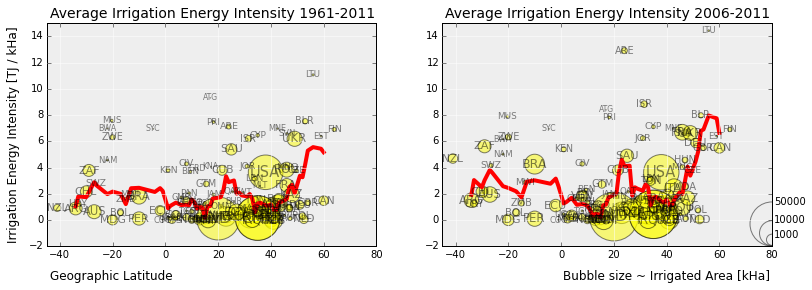

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

fig, axes = plt.subplots(1,2,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(13,4))

#latest irrigation intensity, average all years, for display

avg={}
wgts={}
for i in range(len(points2)):
    if int(points2[i][1])in avg.keys():
        avg[int(points2[i][1])].append(points2[i][2])
        wgts[int(points2[i][1])].append(points2[i][3])
    else: 
        avg[int(points2[i][1])]=[points2[i][2]]
        wgts[int(points2[i][1])]=[points2[i][3]]
for i in avg.keys():
    avg[i]=np.average(avg[i],weights=wgts[i])
    #simple average, old
    #avg[i]=np.average(avg[i])
avg[90]=avg[-90]=0
irrig_intensity={}
kys=np.sort(avg.keys())
for i in range(2,len(kys)-2):
    irrig_intensity[kys[i]] = np.average([avg[kys[i-2]],avg[kys[i-1]],avg[kys[i]],avg[kys[i+1]],avg[kys[i+2]]])

ax=axes[1]
scatter = ax.scatter([i[1] for i in points2],
                      [i[2] for i in points2],
                      s=[i[3]**(0.7) for i in points2],
                      #c=range(len(points)), 
                      c="yellow",
                      alpha=0.5)
x=[]
y=[]
for i in range(len(irrig_intensity)):
    x.append(np.sort(irrig_intensity.keys())[i])
    y.append(irrig_intensity[x[i]])
ax.plot(x,y,'r',linewidth=4)
ax.grid(color='white', linestyle='solid')

ax.set_xlim([-45,80])
ax.set_ylim([-2,15])
ax.set_title("Average Irrigation Energy Intensity 2006-2011", size=14)
ax.text(0.99,-0.15,'Bubble size ~ Irrigated Area [kHa]',size=12, horizontalalignment='right',transform=ax.transAxes)
 
#ax.set_xticks(np.arange(-90, 91, 20))
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels= [repr(i[0]) for i in points2])
mpld3.plugins.connect(fig, tooltip)

#set labels for countries with large enough territory
#load country codes for plot annotations  
cc=pd.read_csv(masterpath.replace('db','map/0')+'cc.csv',';')
for i in points2:
    try: 
        #if ((i[3]>1000) or (i[1]<-15) or (i[1]>45) or ((i[2]>7)and(i[3]>1000))): 
            ax.text(i[1],i[2]-0.0,cc[country_name_converter4(i[0])][0],\
                    size=7+i[3]**0.2, horizontalalignment='center',verticalalignment='center',alpha=0.5)
    except: pass
    
#irrig_intensity.update(interpolate(irrig_intensity,[-50,60]))
irrig_intensity[90]=irrig_intensity[-90]=max(irrig_intensity.values())/3
irrig_intensity.update(interpolate(irrig_intensity,range(-37,60),1,1,2))
for i in range(50,60): irrig_intensity.pop(i)
for i in range(-89,-37): irrig_intensity[i]=irrig_intensity[-37]
for i in range(50,90): irrig_intensity[i]=irrig_intensity[49]

ax.scatter([80],[-1.5],[1000**0.7],facecolors='none',alpha=0.5)
ax.scatter([80],[-1.0],[10000**0.7],facecolors='none',alpha=0.5)
ax.scatter([80],[-0.3],[50000**0.7],facecolors='none',alpha=0.5)
ax.text(1.01,0.05,1000,size=10, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes)
ax.text(1.01,0.12,10000,size=10, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes)
ax.text(1.01,0.2,50000,size=10, horizontalalignment='left',verticalalignment='center',transform=ax.transAxes)

#real irrigation intensity, average all years, for access

avg={}
wgts={}
for i in range(len(points)):
    if int(points[i][1])in avg.keys():
        avg[int(points[i][1])].append(points[i][2])
        wgts[int(points[i][1])].append(points[i][3])
    else: 
        avg[int(points[i][1])]=[points[i][2]]
        wgts[int(points[i][1])]=[points[i][3]]
for i in avg.keys():
    avg[i]=np.average(avg[i],weights=wgts[i])
    #simple average, old
    #avg[i]=np.average(avg[i])
avg[90]=avg[-90]=0
irrig_intensity={}
kys=np.sort(avg.keys())
for i in range(2,len(kys)-2):
    irrig_intensity[kys[i]] = np.average([avg[kys[i-2]],avg[kys[i-1]],avg[kys[i]],avg[kys[i+1]],avg[kys[i+2]]])

ax=axes[0]
scatter = ax.scatter([i[1] for i in points],
                      [i[2] for i in points],
                      s=[i[3]**(0.7) for i in points],
                      #c=range(len(points)), 
                      c="yellow",
                      alpha=0.5)
x=[]
y=[]
for i in range(len(irrig_intensity)):
    x.append(np.sort(irrig_intensity.keys())[i])
    y.append(irrig_intensity[x[i]])
ax.plot(x,y,'r',linewidth=4)
ax.grid(color='white', linestyle='solid')

ax.set_xlim([-45,80])
ax.set_ylim([-2,15])
ax.set_title("Average Irrigation Energy Intensity 1961-2011", size=14)
ax.text(0.01,-0.15,'Geographic Latitude',size=12, horizontalalignment='left',transform=ax.transAxes)
ax.text(-0.1,0.5,'Irrigation Energy Intensity [TJ / kHa]',size=12, horizontalalignment='center',\
        verticalalignment='center',rotation=90,transform=ax.transAxes)

#ax.set_xticks(np.arange(-90, 91, 20))
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels= [repr(i[0]) for i in points])
mpld3.plugins.connect(fig, tooltip)

#set labels for countries with large enough territory
#load country codes for plot annotations  
cc=pd.read_csv(masterpath.replace('db','map/0')+'cc.csv',';')
for i in points:
    try: 
        #if ((i[3]>1000) or (i[1]<-15) or (i[1]>45) or ((i[2]>7)and(i[3]>1000))): 
            ax.text(i[1],i[2]-0.0,cc[country_name_converter4(i[0])][0],\
                    size=7+i[3]**0.2, horizontalalignment='center',verticalalignment='center',alpha=0.5)
    except: pass
    
#irrig_intensity.update(interpolate(irrig_intensity,[-50,60]))
irrig_intensity[90]=irrig_intensity[-90]=max(irrig_intensity.values())/3
irrig_intensity.update(interpolate(irrig_intensity,range(-37,60),1,1,2))
for i in range(50,60): irrig_intensity.pop(i)
for i in range(-89,-37): irrig_intensity[i]=irrig_intensity[-37]
for i in range(50,90): irrig_intensity[i]=irrig_intensity[49]

plotpath="E:/Dropbox (MIT)/Public/Food-Energy/plots/"
fig.savefig(plotpath+'irrig.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

<h4>Fishing profiling</h4>

In order to decide on the average energy needs of fishing at different industry scales, we conduct an fishing profiling. Countries without specific fishing energy data are assigned a characteristic fishing energy intensity for their other fishing nations comparable to their size. For this we use the already parsed <code>balance</code> dataframe.

In [58]:
#fishing profiling
fishing = balance.xs(['Production','Fish, Seafood'],level=[3,2]).drop('ItemCode',axis=1)
points=[]

#get available fishing data
fish_diesel1=energy.xs([fuels3[0]],level=[3]).reset_index().drop('Element', axis=1).set_index(['Country', 'Year'])
fish_diesel2=energy.xs([fuels3[1]],level=[3]).reset_index().drop('Element', axis=1).set_index(['Country', 'Year'])
for country in countries:
    if '+ (Total)' not in country:
        fishing_list={}
        land_list={}
        try:
            years=range(1961,2012)
            for year in years:
                try:
                    #power for fishing per area (TJ/ktonnes of fish)
                    land_list[year]=fishing.xs([country,year],level=[0,1]).values[0][0]
                    if (land_list[year]!=0):
                        if (fish_diesel1.xs([country,year],level=[0,1]).values[0][0]+\
                             fish_diesel2.xs([country,year],level=[0,1]).values[0][0] != 0): 
                            fishing_list[year]=(fish_diesel1.xs([country,year],level=[0,1]).values[0][0]+\
                                 fish_diesel2.xs([country,year],level=[0,1]).values[0][0])\
                                 /land_list[year]
                except: pass
            try: 
                points.append([country,pd.DataFrame(fishing_list.values()).mean().values[0],\
                               pd.DataFrame(land_list.values()).mean().values[0]])
            except: pass
        except: pass

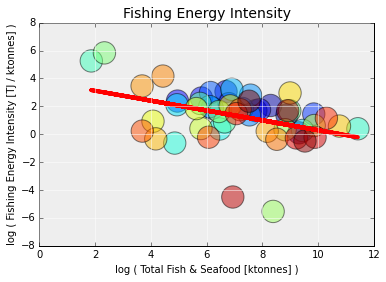

In [59]:
import mpld3
mpld3.enable_notebook()

y=[np.log(i[1]) for i in points]
x=[np.log(i[2]) for i in points]
w = np.linalg.lstsq(np.array([ np.array(x), np.ones(len(x))]).T,y)[0] # obtaining regression parameters
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
scatter = ax.scatter(x,y,s=500,c=range(len(x)),alpha=0.5)
ax.plot(x,w[0]*np.array(x)+w[1],'r',linewidth=4)
ax.grid(color='white', linestyle='solid')
ax.set_title("Fishing Energy Intensity", size=14)
ax.set_xlabel('log ( Total Fish & Seafood [ktonnes] )')
ax.set_ylabel('log ( Fishing Energy Intensity [TJ / ktonnes] )')
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels= [repr(i[0]) for i in points])
fig.savefig(plotpath+'fishing.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
mpld3.plugins.connect(fig, tooltip)

In [60]:
def fishing_energy(country,year):
    try:
        return np.exp(w[0]*np.log(fishing.xs([country,year],level=[0,1]).values[0][0])+w[1])\
                         *fishing.xs([country,year],level=[0,1]).values[0][0]
    except:
        return 0

<h4>Main code setup</h4>

In [61]:
def elapsed():
    from time import time
    global t0
    print time()-t0
    t0=time()

Assign predfined colors for major nodes.

In [62]:
def color(i,node):
    #Sankey Diagram coloring function (optional, Sankey.js does automatic coloring if missing)
    if node in {"Fossil Fuels"}: return "#c49c94"
    elif node in {"Labor"}: return "#7f7f7f"
    elif node in {"Renewables & Nuclear"}: return "#2ca02c"
    elif node in {"Stock Draw","Stock Deposit","Waste"}: return "#c7c7c7"
    elif node in {"Fertilizers"}: return "#c5b0d5"
    elif node in {"Import","Export"}: return "#aec7e8"
    elif node in {"Electricity"}: return "#bcbd22"
    elif node in {'Cereals'}: return "#e7ba52"
    elif node in {'Oilcrops'}: return "#ff9896"
    elif node in {'Fruits, Roots & Vegetables'}: return "#98df8a"
    elif node in {'Sugar Crops'}: return "#ffbb78"
    elif node in {"Feed"}: return "#dbdb8d"
    elif node in {"Seed"}: return "#dbdb8d"
    elif node in {"Processing"}: return "#9edae5"
    elif node in {'Animal Products'}: return "#17becf"
    elif node in {'Aquatic Products'}: return "#1f77b4"
    elif node in {'Vegetable Oils'}: return "#f7b6d2"
    elif node in {'Other Processed'}: return "#9c9ede"
    elif node in {'Sugar'}: return "#d6616b"
    elif node in {"Food", "Production"}: return "#b5cf6b"
    elif node in {"Biofuels & Other"}: return "#e7ba52"
    elif node in {'Crop Residue'}: return "#bd9e39"
    else: return ""

Assign a predfined position in the horizontal plane for major nodes.

In [63]:
def layer(i,node):
    if (i==2):
        #Sankey Diagram layering function (optional, Sankey.js does automatic layering if missing)
        if node in {"Fossil Fuels", "Labor", "Renewables & Nuclear", "Stock Draw"}: return 0
        elif node in {"Fertilizers", "Electricity", "Import"}: return 1
        elif node in {"Production"}: return 5
        elif node in parent:
            if (parent[node] == 'None'): return 3
            else: return 4
        else: return -1
    elif (i==3):
        #Sankey Diagram layering function (optional, Sankey.js does automatic layering if missing)
        if node in {"Production","Import", "Stock Draw"}: return 0
        elif node in {"Export", "Biofuels & Other", "Food", "Stock Deposit", "Waste, Crop Residue"}: return 16
        elif node in {"Feed", "Processing"}: return 10
        elif node in parent:
            if (parent[node] == 'None'): return 5
            else: return 13
        else: return -1
    else:
        #Sankey Diagram layering function (optional, Sankey.js does automatic layering if missing)
        if node in {"Fossil Fuels", "Labor", "Renewables & Nuclear", "Stock Draw"}: return 0
        elif node in {"Fertilizers", "Electricity", "Import"}: return 2
        elif node in {"Export", "Biofuels & Other", "Food", "Stock Deposit", "Waste, Crop Residue","Seed"}: return 16
        elif node in {"Feed", "Processing"}: return 10
        elif node in parent:
            if (parent[node] == 'None'): return 5
            else: return 13
        else: return -1

<h4>First run profiling</h4>

Define first run profiling parameters, i.e. set a baseline for all values, intensities, etc. using global values. The following 2 cells always need to be run before the *Main* code, but *only once*, before the first run.

In [64]:
firstrun = True
#define all countries and regions to iterate over during pre-profiling
countries={i for i in balance.index.get_level_values('Country').unique() if "+" not in i}
regions={'Small Island Developing States','Caribbean','Eastern Asia',\
         'European Union','Least Developed Countries',\
 'Low Income Food Deficit Countries','Northern Africa','Northern America',\
 'South America','Southern Africa','Southern Asia','World'}
countries=set(list(countries.union(regions)))

Conduct first run profiling. This defines the crop <code>supergroups</code> and <code>parents</code>, defines a basic agriculture energy share for countries and defines a basic calorie content for all products.

In [65]:
#code to execture only once, on startup
if (firstrun):
    try: 
        
        n = 4 #number of grouping variations = number of detail levels
        m = 4 #number of data variations = number of data levels

        #group to which food item entry belongs to. defined in food_groups()
        #custom groups possible, along the FAO official ones 
        #i.e. Cereals for Wheat, Meat for Poultrymeat, Alcoholic Beverages for Wine
        supergroup=[{} for i in range(n)]
        #food item parent(source) node, where applicable (secondary food items) 
        #i.e. Feed for Animal Products, Milk for Cheese, Processing for Vegetable Oils & Sugar
        parent={}
        #precentage of crop that is unused but has energy residues remaining inside it, husk
        #this is necessary for recording crop residues on the gross energy details level
        gross={}

        #define food categories. this is done globally, from World 2008 data 
        #presumed to be one of the most comprehensive
        food_groups('World',2008)
        #afer processing we can drop the itemcode column from balance, unless it has already been done
        balance.drop('ItemCode', axis=1, inplace=True)
        
        #agri preprofiling: load agriculture energy share from dataframe and extrapolate where necessary 
        agrienergy=fuel_preprofiling(range(1960,2015))
        
        #food calorie profiling for world to set benchmark crop calorific values
        food_extended = food_profiling('World') 
        food_cal_world = food_cal_profiling('World')
          
        firstrun=False
        print 'firstrun configuration finished'
    except: print 'firstrun configuration error'

firstrun configuration finished


<h4>Main</h4>

The main code is structured a two nested loops: he outer loops over the countries and regions, whereas the inner loops over the years. For every country and region, before entering the years loop, variable initializations and profilings are conducted. Based on teh availability of years obtained upon <code>food_profiling</code>, the rest of code is invoked only for those years.

In [ ]:
###############################################################################################
######                                   MAIN                                            ######
###############################################################################################
    
#define countries and regions to iterate over
countries={i for i in balance.index.get_level_values('Country').unique() if "+" not in i}
regions={'Small Island Developing States','Caribbean','Eastern Asia',\
         'European Union','Least Developed Countries',\
 'Low Income Food Deficit Countries','Northern Africa','Northern America',\
 'South America','Southern Africa','Southern Asia','World'}
#countries={"Afghanistan"}
#countries=set(list({i[0][0] for i in population.T.iteritems() if "+" not in i[0][0]} | {"World"})[0:200])
#countries={"Saint Helena, Ascension and Tristan da Cunha","Sao Tome and Principe"}
#countries={"United States"}
#countries={"Romania"}
#countries={"C\xf4te d'Ivoire",'Ghana','Zambia','Rwanda','India','China'}
#countries={"Russian Federation","United States of America","Brazil","Hungary","Romania","United Arab Emirates"}
#countries={"United States of America"}
#countries={"China","Canada"}
#countries={'China, Hong Kong SAR'}
#countries={"China, Taiwan Province of"}
#countries={"United Arab Emirates"}
#countries={"Iran (Islamic Republic of)"}
countries={"Turkmenistan", "Malaysia"}
#countries={'World'}
#countries={'Belize','Barbados','Burkina Faso'}
#regions={'Northern America'}
#countries=set([])
regions=set([])
c=[]    
t0=0    
progress=0
problematic=[]

#main loop - double check the countries!
for country in set(list(countries.union(regions))):
    
    try: 
        pc=json.loads(file(savepath+country+'m.json','r').read())
        print country, "data already exists, overwriting"
        
        raise KeyError()  #uncomment only if you want to overwrite existingdata
        
    except:
        
        try:   
            
            #######################################################################
            ######                       MAIN SETUP                          ######
            #######################################################################

            
            #food (meta) profiling independent of years, processes all data  
            food_extended        = food_profiling(country) 
            #load food item caloric values
            foodcalorie          = food_cal_profiling(country)     
                    
            #extract years of data availalibity for country under iteration or use predefined range
            years = {i for a in food_extended for i in food_extended[a].keys()}
            #years = range(1961,1963) #for developer purposes only

            #create metadata variable to save EROEIs for years with available data
            eroei=[{} for k in range(m)]
            eroei_adj=[{} for k in range(m)]

            #create metadata variable to save average energy content years with available data
            aec=[{} for k in range(m)]

            #helper variables to monitor data integrity
            missing=set([])
            estimated=set([])
            integrity={}
            for year in years: integrity[year]=[]
            
            #conduct data profiling, interpolate and extrapolate database values where missing
            #also, after it has been indexed, load the data from pandas dataframes into python dictionaries, 
                                           #which are much faster to work with in case of sparse operations
            
            wdi_import_extended  = wdi_import_profiling(country,years)    
            energy_extended      = fuel_profiling(country, years)   
            energy_extended      = fuel_reprofiling(country, years,energy_extended)
            if (energy_extended=={}):
                print 'progress:',progress*100,'%',country, "no energy input data for any year, skipping"
                raise KeyError() 
            electricity_extended = electricity_profiling(country, years)
            fertilizers_extended = fert_profiling(country, years)
            population_extended  = labor_profiling(country, years)
            if country not in {'World'}:
                import_extended      = import_profiling(country ,years)
            
            #raise KeyError()  #uncomment only if you want to do data-profiling
            
            for year in years:    
                
                # initialize global variables
                at_least_one=False
                #initialize food import variable for sum collection and processing for EROEI
                foodimport=[0 for k in range(m)]
                #initialize food input variable for sum collection and processing for EROEI
                foodinput=[0 for k in range(m)]
                #initialize food output variable for sum collection and processing for EROEI
                foodoutput={"Food":[0 for k in range(m)],\
                            "Biofuels & Other":[0 for k in range(m)],\
                            "Export":[0 for k in range(m)],\
                            "Stock Deposit":[0 for k in range(m)],\
                            "Crop Residue":[0 for k in range(m)]}
                foodinput2={"Fossil Fuels":[0 for k in range(m)],\
                            "Renewables & Nuclear":[0 for k in range(m)],\
                            "Labor":[0 for k in range(m)],\
                            "Seed":[0 for k in range(m)],\
                            "Stock Draw":[0 for k in range(m)]}
                #counter for the groupdict below
                count = [[0 for k in range(m)] for i in range(n)]
                #initialize dictionary for item order of addition - necessary format for sankey.js
                groupdict=[[{} for k in range(m)] for i in range(n)]
                #dictionary to keep track of food item sums in case of aggregations, based on the supergroup  
                supersum=[[{} for k in range(m)] for i in range(n)]      
                #initialize dictionary array for later JSON export for D3 & sankey.js visualization
                data=[[{"nodes":[],"links":[]} for k in range(m)] for i in range(n)]
                #save source crop share for supply input distribution later
                share=[[{} for k in range(m)] for i in range(n)]
                #elelctricity counters reset
                eltotal=0
                eltotal_n=0
                electricity_to_fossil=0

                #run code by parts

                #######################################################################
                ######                       MAIN CODE                           ######
                #######################################################################

                food_data_ok=True
                try: 
                    food_part(country, year)
                except:
                    print country, year, 'food error, skipping year' 
                    food_data_ok=False
            
                #check for food data availability, part of data quality profiling criterion
                if food_data_ok: 
                    try: fuels_part1(country, year)
                    except: print country,year,"fuel1 error"
                    try: fuels_part2(country, year, eltotal, 0)
                    except: print country,year,"fuel2a error"
                    try: fuels_part2(country, year, eltotal_n, 1)
                    except: print country,year,"fuel2b error"
                    try: fuels_part3(country, year)
                    except: print country,year,"fuel3 error"
                    try: fertilizers_part(country, year)
                    except: print country,year,"fertilizers error"
                    try: labor_part(country, year)
                    except: print country,year,"labor error" 
                    if country not in {'World'}:
                        try: import_part(country, year)
                        except: print country,year,"import error" 
                    try:
                        save_data(country_name_converter3(country), year)
                        at_least_one=True
                    except:
                        print country, year, 'save error'
                        food_data_ok=False
            
            #shorten country names if aggregate, such as World, solve unicode conflicts 
            country=country_name_converter3(country)
            progress+=1.0/len(countries.union(regions))
            
            #save EROEI values for years with available data
            if at_least_one:
                c.append(country)
                print 'progress:',progress*100,'%',country,'save OK for',eroei[0].keys()
                
                #normalize eroei
                for k in range(m):
                    keys=eroei[k].keys()
                    for year in keys:
                        pass
                        #if (np.isnan(eroei[k][year])|(eroei[k][year]==0)): eroei[k].pop(year);
                    if set(eroei[k].keys()).intersection(years):
                        #interpolate null or NaN eroei values
                        eroei[k].update(interpolate(eroei[k],years,1))
                
                #normalize aec
                for k in range(m):
                    keys=aec[k].keys()
                    for year in keys:
                        pass
                        #if (np.isnan(aec[k][year])|(aec[k][year]==0)): aec[k].pop(year);
                    if set(aec[k].keys()).intersection(years):
                        #interpolate null or NaN aec values
                        aec[k].update(interpolate(aec[k],years,1))
                        
                #calculate adjusted EROEI
                for k in range(m):
                    keys=aec[k].keys()
                    minyear=min(keys) #first available year - to normalize after
                    for year in keys:
                        try: eroei_adj[k][year]=eroei[k][year]/(aec[k][year]/aec[k][minyear])
                        except: eroei_adj[k][year]=0
                    
                    
                #save missing, estimated & interpolated data item list and EROEI
                file(savepath+country+'m.json','w').write(json.dumps({"missing":list(missing),
                                                                      "estimated":list(estimated),
                                                                      "interpolated":integrity,
                                                                      "eroei":eroei_adj,
                                                                      "eroei_raw":eroei,
                                                                      "aec":aec}))
            else:
                print 'progress:',progress*100,'%',country, "no food data for any year, skipping"
                raise KeyError() 

        except: 
            print 'progress:',progress*100,'%',country, "major data insufficiency, skipping country"
            problematic.append(country)

prev_countries={'countries':[]}
try: prev_countries=json.loads(file(savepath+'countries.json','r').read())
except: print 'country list does not exist, creating one'
for i in c:
    if i not in prev_countries['countries']:
        prev_countries['countries'].append(i)
prev_countries['countries'].sort()
file(savepath+'countries.json','w').write(json.dumps(prev_countries))
if problematic: print "Errors encountered for the following countries",problematic

<br>
<h2>Disclaimer</h2>
<p>We would like to express our gratitude to all of the developers of the libraries used and especially to the affiliates of <i>FAOSTAT</i> for their great database and openly accesible data. The data manipulation algorithms and visualization techniques are open sourced and freely reproducible, forks are welcome on <a href="https://github.com/csaladenes/Food-Energy">GitHub</a> (soon to be made public under <i>MIT license</i>). The concept and methodology are subject to copyright of the authors.</p><br>
<br>
<a href="http://www.csaladen.es" target="_blank">Dénes Csala</a>&nbsp;&nbsp;|&nbsp;&nbsp;2015